In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
# timesteps from 1h to 24h 
df = pd.read_csv("cleaned_data\\24timestep1h.csv", parse_dates=['tstp'])
df = df.drop(['date'], axis=1) # date column when joined with the holiday

In [3]:
df['LCLid'].unique()

array(['MAC003686', 'MAC003281', 'MAC001628', 'MAC005205', 'MAC004280',
       'MAC002751', 'MAC003134', 'MAC003792', 'MAC000695', 'MAC005034',
       'MAC002413', 'MAC000544', 'MAC003903', 'MAC003445', 'MAC000897',
       'MAC002606', 'MAC001313', 'MAC003901', 'MAC004400', 'MAC001124',
       'MAC001660', 'MAC001680', 'MAC003255', 'MAC003729', 'MAC000340',
       'MAC002669', 'MAC003389', 'MAC003248', 'MAC002468', 'MAC000726',
       'MAC005485', 'MAC001814', 'MAC003238', 'MAC000202', 'MAC004729',
       'MAC000664', 'MAC003972', 'MAC001323', 'MAC005439', 'MAC003518',
       'MAC001456', 'MAC000477', 'MAC005511', 'MAC004493', 'MAC002758',
       'MAC003631', 'MAC002463', 'MAC002387', 'MAC000617', 'MAC001072',
       'MAC005344'], dtype=object)

In [6]:
columns_remained = [
    'tstp', 'energy(kWh/hh)', 'LCLid', 'stdorToU', 'Acorn', 'visibility',
       'windBearing', 'temperature', 'dewPoint', 'pressure',
       'apparentTemperature', 'windSpeed', 'precipType', 'humidity', 'summary', 'Type',
       'year', 'month', 'day', 'dayofweek_num', 'is_weekend', 'season',
       'no_work', 'hour', 'at_home', 'shifted_energy_1h', 'shifted_energy_2h', 'shifted_energy_3h',
       'shifted_energy_4h', 'shifted_energy_5h', 'shifted_energy_6h',
       'shifted_energy_7h', 'shifted_energy_8h', 'shifted_energy_9h',
       'shifted_energy_10h', 'shifted_energy_11h', 'shifted_energy_12h',
       'shifted_energy_13h', 'shifted_energy_14h', 'shifted_energy_15h',
       'shifted_energy_16h', 'shifted_energy_17h', 'shifted_energy_18h',
       'shifted_energy_19h', 'shifted_energy_20h', 'shifted_energy_21h',
       'shifted_energy_22h', 'shifted_energy_23h', 'shifted_energy_24h'
]

sampled_df = df[columns_remained]

# Single Household

In [27]:
singlehousehold_df_grp = sampled_df.groupby(['LCLid'])
singlehousehold_df = singlehousehold_df_grp.get_group('MAC003686')

In [22]:
def plot_dayofweek_electricity(year, weeknum):
    # find seasonal pattern in hour for each day
    fig, axs = plt.subplots(4, 3, sharey=True, figsize=(14, 6))
    sampled_y = singlehousehold_df.loc[(singlehousehold_df['year'] == year) & (singlehousehold_df['tstp'].dt.isocalendar().week == weeknum)]
    start_date = sampled_y['tstp'].min()
    end_date = sampled_y['tstp'].max()
    
    fig.suptitle(f'Date between {start_date} and {end_date}')
    dayofweek = 0
    
    for row in range(0, 4):
        for col in range(0, 3):
            if dayofweek == 7:
                break
                
            start_idx = 0 + (dayofweek * 24)
            end_idx = 24 + (dayofweek * 24)
            
            sns.lineplot(x=np.arange(0, 24), y=sampled_y['energy(kWh/hh)'].iloc[start_idx:end_idx], marker='o', ax=axs[row][col])
            axs[row][col].set_title(f'Day of week: {dayofweek}')
    
            dayofweek += 1
    
    plt.tight_layout()
    plt.show()

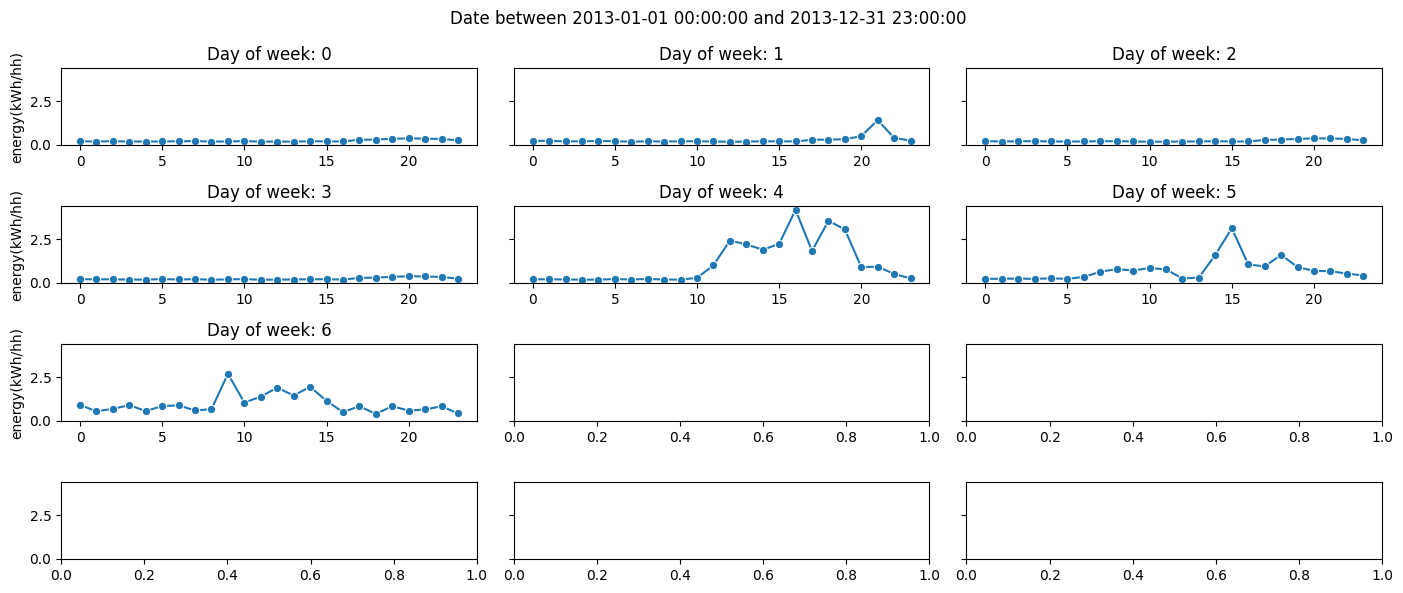

In [24]:
plot_dayofweek_electricity(2013, 1)

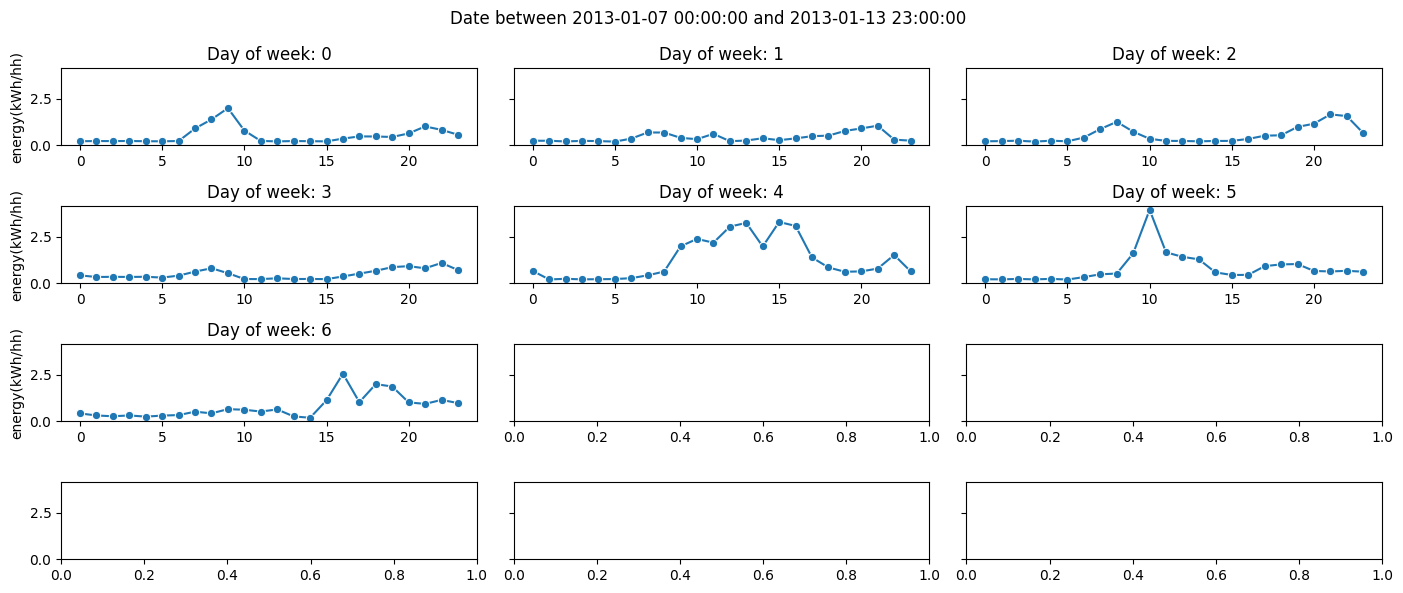

In [25]:
plot_dayofweek_electricity(2013, 2)

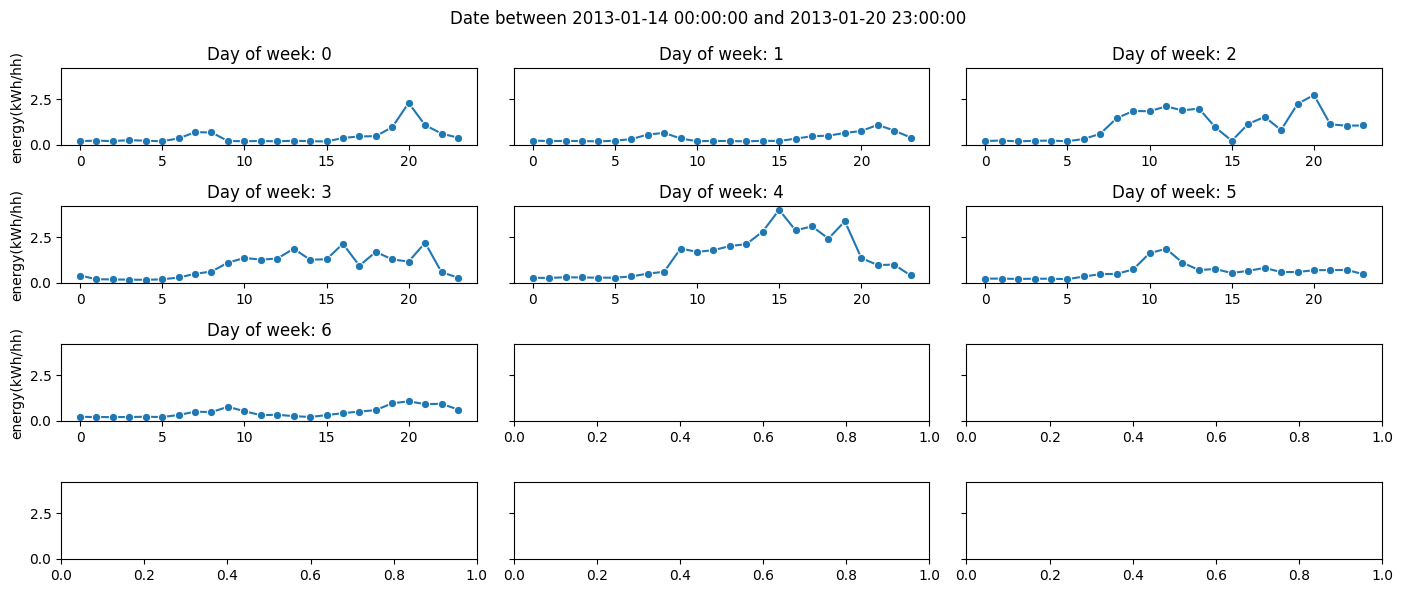

In [26]:
plot_dayofweek_electricity(2013, 3)

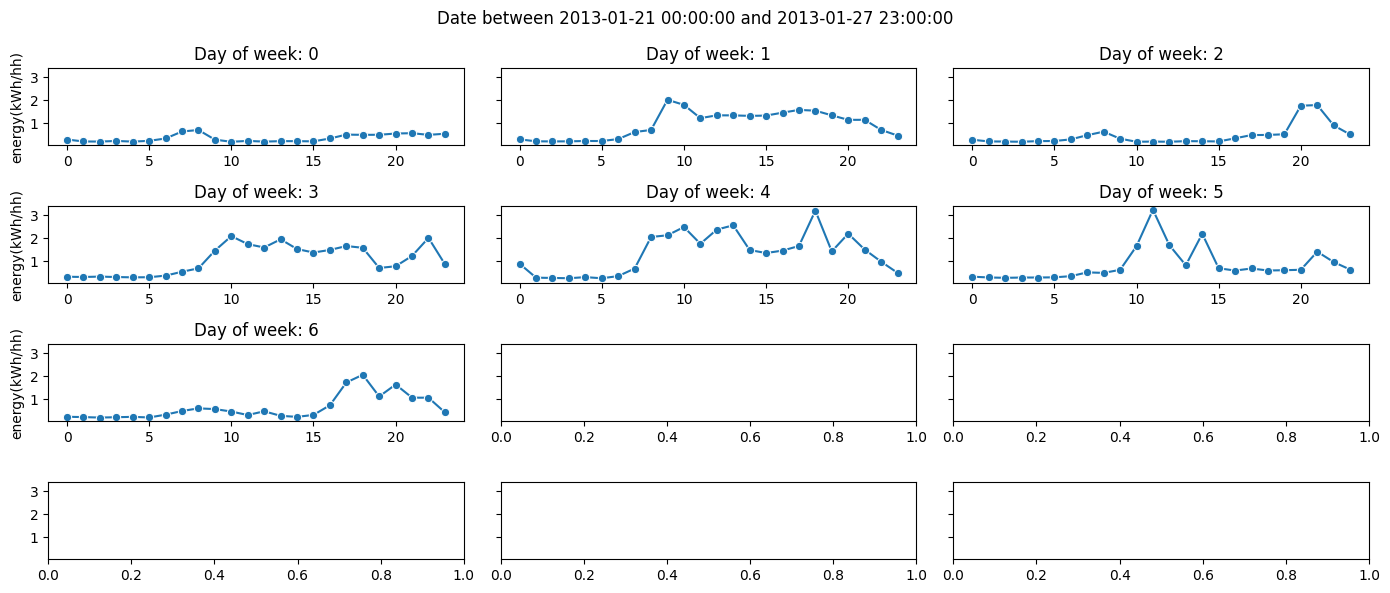

In [27]:
plot_dayofweek_electricity(2013, 4)

### Pre-Processing

In [28]:
columns_dropped = ['windBearing', 'pressure']

singlehousehold_df = singlehousehold_df.drop(columns=columns_dropped, axis=1)
singlehousehold_df.head(3)

tstp  energy(kWh/hh)      LCLid stdorToU    Acorn  \
0 2012-10-17 10:00:00           0.224  MAC003686      Std  ACORN-A   
1 2012-10-17 11:00:00           0.215  MAC003686      Std  ACORN-A   
2 2012-10-17 12:00:00           0.213  MAC003686      Std  ACORN-A   

   visibility  temperature  dewPoint  apparentTemperature  windSpeed  ...  \
0       12.15        14.34     10.86                14.34       5.77  ...   
1       12.81        15.18     10.66                15.18       6.47  ...   
2       13.04        15.92      9.91                15.92       7.04  ...   

  shifted_energy_15h  shifted_energy_16h shifted_energy_17h  \
0              0.972               1.503              1.055   
1              0.792               0.972              1.503   
2              0.452               0.792              0.972   

  shifted_energy_18h  shifted_energy_19h  shifted_energy_20h  \
0              0.358               0.214               0.549   
1              1.055               0.358               0.214   
2              1.503               1.055               0.358   

   shifted_energy_21h  shifted_energy_22h  shifted_energy_23h  \
0               0.548               0.557               0.801   
1               0.549               0.548               0.557   
2               0.214               0.549               0.548   

   shifted_energy_24h  
0               0.317  
1               0.801  
2               0.557  

[3 rows x 47 columns]

In [29]:
singlehousehold_df['summary'].unique()

array(['Foggy', 'Mostly Cloudy', 'Partly Cloudy',
       'Breezy and Partly Cloudy', 'Clear', 'Overcast',
       'Breezy and Mostly Cloudy', 'Windy and Mostly Cloudy', 'Breezy',
       'Breezy and Overcast', 'Windy', 'Windy and Overcast'], dtype=object)

In [ ]:
replace_summary_weather = dict.fromkeys(
    ['']
)

In [29]:
import math
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# label encoding
precip_encoder = OneHotEncoder(sparse_output=False)
holiday_encoder = OneHotEncoder(sparse_output=False)
summary_encoder = OneHotEncoder(sparse_output=False)

precip_labels = precip_encoder.fit_transform(singlehousehold_df[['precipType']])
holiday_labels = holiday_encoder.fit_transform(singlehousehold_df[['Type']])
summary_labels = summary_encoder.fit_transform(singlehousehold_df[['summary']])

precip_labels = pd.DataFrame(precip_labels, columns=precip_encoder.get_feature_names_out()).astype('int8')
holiday_labels = pd.DataFrame(holiday_labels, columns=holiday_encoder.get_feature_names_out()).astype('int8')
summary_labels = pd.DataFrame(summary_labels, columns=summary_encoder.get_feature_names_out()).astype('int8')

singlehousehold_df = pd.concat([singlehousehold_df, precip_labels], axis=1)
singlehousehold_df = pd.concat([singlehousehold_df, holiday_labels], axis=1)
singlehousehold_df = pd.concat([singlehousehold_df, summary_labels], axis=1)

singlehousehold_df = singlehousehold_df.drop(['precipType', 'Type', 'summary'], axis=1)

# get the first 90% and forecast the remaining 10%, must be in order
cutoff_point = math.floor(singlehousehold_df.shape[0] * 0.9)
training_singlehousehold_df = singlehousehold_df.iloc[:cutoff_point]
testing_singlehousehold_df = singlehousehold_df.iloc[cutoff_point:]

training_date_index = training_singlehousehold_df['tstp']
testing_date_index = testing_singlehousehold_df['tstp']

X_train = training_singlehousehold_df.drop(['tstp', 'LCLid', 'stdorToU', 'Acorn', 'energy(kWh/hh)'], axis=1)
y_train = training_singlehousehold_df['energy(kWh/hh)']

X_test = testing_singlehousehold_df.drop(['tstp', 'LCLid', 'stdorToU', 'Acorn', 'energy(kWh/hh)'], axis=1)
y_test = testing_singlehousehold_df['energy(kWh/hh)']

print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)
print("y train shape:", y_train.shape)
print("y test shape:", y_test.shape)

X train shape: (10770, 62)
X test shape: (1197, 62)
y train shape: (10770,)
y test shape: (1197,)


## Lagged Time Step (Autoregressive Approach)

In [436]:
# split a multivariate sequence into samples (this is for encoder-decoder models)
def split_sequences(sequences, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequences)):
        # find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out-1
		# check if we are beyond the dataset
		if out_end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
		X.append(seq_x)
		y.append(seq_y)
        
	return np.array(X), np.array(y)

# for univariate
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [533]:
X_train.columns

Index(['visibility', 'temperature', 'dewPoint', 'apparentTemperature',
       'windSpeed', 'humidity', 'year', 'month', 'day', 'dayofweek_num',
       'is_weekend', 'season', 'no_work', 'hour', 'at_home',
       'shifted_energy_24h', 'shifted_energy_48h', 'shifted_energy_72h',
       'shifted_energy_96h', 'shifted_energy_120h', 'shifted_energy_144h',
       'shifted_energy_168h', 'precipType_rain', 'precipType_snow',
       'Type_Boxing Day', 'Type_Christmas Day', 'Type_Early May bank holiday',
       'Type_Easter Monday', 'Type_Good Friday', 'Type_New Year's Day',
       'Type_No Holiday', 'Type_Spring bank holiday',
       'Type_Summer bank holiday', 'summary_Breezy',
       'summary_Breezy and Mostly Cloudy', 'summary_Breezy and Overcast',
       'summary_Breezy and Partly Cloudy', 'summary_Clear', 'summary_Foggy',
       'summary_Mostly Cloudy', 'summary_Overcast', 'summary_Partly Cloudy',
       'summary_Windy', 'summary_Windy and Mostly Cloudy',
       'summary_Windy and Overcast

In [545]:
from numpy import hstack

n_steps_in = 24
n_steps_out = 24

features = [
    'apparentTemperature', 'temperature'
]

train_dataset = hstack((X_train[features], np.expand_dims(y_train.values, axis=1)))
test_dataset = hstack((X_test[features], np.expand_dims(y_test.values, axis=1)))
sequenced_X_train, sequenced_y_train = split_sequences(train_dataset, n_steps_in, n_steps_out)
sequenced_X_test, sequenced_y_test = split_sequences(test_dataset, n_steps_in, n_steps_out)

In [487]:
from numpy import hstack

n_steps_in = 24
n_steps_out = 24

sequenced_X_train, sequenced_y_train = split_sequence(y_train, n_steps_in, n_steps_out)
sequenced_X_test, sequenced_y_test = split_sequence(y_test, n_steps_in, n_steps_out)

C:\Users\Usrer\AppData\Local\Temp\ipykernel_7968\2731040467.py:29: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]


In [546]:
sequenced_X_train.shape

(10594, 24, 2)

In [547]:
sequenced_X_test.shape

(1137, 24, 2)

## Differencing, Detrend (FLAT VALUES)

In [30]:
# scale the values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train_dataset = scaler.fit_transform(X_train.values.copy())
test_dataset = scaler.transform(X_test.values.copy())

train_dataset = train_dataset.reshape(train_dataset.shape[0], 1, train_dataset.shape[1])
test_dataset = test_dataset.reshape(test_dataset.shape[0], 1, test_dataset.shape[1])

## Generate Periodic Features (not that useful)

### Spline Transformation

<Figure size 1008x576 with 0 Axes>

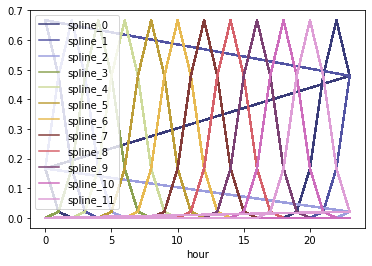

In [14]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import SplineTransformer

def periodic_spline_transformer(period, n_splines=None, degree=3):
    if n_splines is None:
        n_splines = period
        
    n_knots = n_splines + 1 # periodic and include_bias is true
    return SplineTransformer(
        degree=degree,
        n_knots=n_knots,
        knots=np.linspace(0, period, n_knots).reshape(n_knots, 1),
        extrapolation='periodic',
        include_bias=True
    )

splines = periodic_spline_transformer(24, n_splines=12).fit_transform(singlehousehold_df[['hour']])
splines_df = pd.DataFrame(
    splines,
    columns=[f'spline_{i}' for i in range(splines.shape[1])]
)

plt.figure(figsize=(14, 8))
pd.concat([singlehousehold_df['hour'], splines_df], axis=1).plot(x='hour', cmap=plt.cm.tab20b)
plt.show()

In [15]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from numpy import hstack

hour_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
season_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('cyclic_hour', periodic_spline_transformer(24, n_splines=12), ['hour']),
        ],
        remainder=MinMaxScaler()
    )
)

preprocessed_train = pipeline.fit_transform(X_train[['season', 'hour', 'month']])
preprocessed_test = pipeline.transform(X_test[['season', 'hour', 'month']])

In [16]:
preprocessed_features = ['hour']

scaler = MinMaxScaler()

remaining_train = X_train.drop(columns=preprocessed_features, axis=1)
remaining_test = X_test.drop(columns=preprocessed_features, axis=1)

scaled_remaining_train = scaler.fit_transform(remaining_train)
scaled_remaining_test = scaler.transform(remaining_test)

features_train = hstack((preprocessed_train, scaled_remaining_train))
features_test = hstack((preprocessed_test, scaled_remaining_test)) 

features_train = np.expand_dims(features_train, axis=1)
features_test = np.expand_dims(features_test, axis=1)

print(features_train.shape)
print(features_test.shape)

(10640, 1, 39)
(1183, 1, 39)


In [17]:
print(y_train.shape)
print(y_test.shape)

(10640,)
(1183,)


### Fourier Transformation

In [49]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

def create_fourier(date_index):
    fourier = CalendarFourier(
        freq='D',
        order=1
    )
    dp = DeterministicProcess(
        index=date_index,
        constant=True,
        order=1,
        seasonal=True,
        additional_terms=[fourier],
        drop=True
    )

    return dp

In [50]:
fourier_object = create_fourier(training_singlehousehold_df.set_index('tstp').asfreq('h').index)
fourier_train_features = fourier_object.in_sample().reset_index().drop(['tstp'], axis=1)
fourier_test_features = fourier_object.out_of_sample(steps=1183).reset_index().drop(['index'], axis=1)

X_train_fourier = pd.concat([X_train, fourier_train_features], axis=1)
X_test_fourier = pd.concat([X_test.reset_index().drop(['index'], axis=1), fourier_test_features], axis=1)


print(X_train_fourier.shape)
print(X_test_fourier.shape)

(10770, 87)
(1197, 87)


In [51]:
# scale the values
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train_dataset = scaler.fit_transform(X_train_fourier.copy())
test_dataset = scaler.transform(X_test_fourier.copy())

train_dataset = train_dataset.reshape(train_dataset.shape[0], 1, train_dataset.shape[1])
test_dataset = test_dataset.reshape(test_dataset.shape[0], 1, test_dataset.shape[1])

print(train_dataset.shape)
print(test_dataset.shape)

(10770, 1, 87)
(1197, 1, 87)


## Modelling

In [54]:
## MAPE: 35% without any cyclic transformation (flat)
## MAPE: 31% with univariate 24 timesteps and 24 neurons in LSTM layer (univariate)
## MAPE: 29% with flat features with continuous lagged feautures (24 steps), and good forecast values (not weird flat)

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, RepeatVector, 
    TimeDistributed, Conv1D, MaxPooling1D, 
    Flatten, GRU, Dropout, 
    Normalization, Bidirectional, BatchNormalization, Input,
    Concatenate
)

tf.random.set_seed(42)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5)

input_layer = Input(shape=(1, train_dataset.shape[2]))
# lstm1 = LSTM(24, return_sequences=True)(input_layer)
# dropout1 = Dropout(0.2)(lstm1)
# flatten1 = Flatten()(dropout1)
# repeat_vector1 = RepeatVector(24)(flatten1)

# conv1 = Conv1D(64, kernel_size=1)(input_layer)
lstm1 = LSTM(100, return_sequences=True)(input_layer)
dropout1 = Dropout(0.2)(lstm1)
fc1 = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(dropout1)
fc2 = TimeDistributed(Dense(64, activation='relu'))(fc1)
output_layer = TimeDistributed(Dense(1))(fc2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    train_dataset,
    y_train,
    epochs=50,
    validation_split=0.2, 
    callbacks=[earlystop]
)

Epoch 1/50
270/270 [==============================] - 4s 9ms/step - loss: 2.7092 - mae: 0.3407 - mse: 0.2635 - mape: 67.1868 - val_loss: 0.3499 - val_mae: 0.3797 - val_mse: 0.2732 - val_mape: 60.7181
Epoch 2/50
270/270 [==============================] - 2s 7ms/step - loss: 0.2469 - mae: 0.2721 - mse: 0.1910 - mape: 49.8141 - val_loss: 0.3024 - val_mae: 0.3302 - val_mse: 0.2540 - val_mape: 42.9005
Epoch 3/50
270/270 [==============================] - 2s 7ms/step - loss: 0.2148 - mae: 0.2517 - mse: 0.1692 - mape: 44.8658 - val_loss: 0.3016 - val_mae: 0.3175 - val_mse: 0.2545 - val_mape: 37.5176
Epoch 4/50
270/270 [==============================] - 2s 6ms/step - loss: 0.2067 - mae: 0.2460 - mse: 0.1641 - mape: 43.6827 - val_loss: 0.2744 - val_mae: 0.3068 - val_mse: 0.2321 - val_mape: 38.5300
Epoch 5/50
270/270 [==============================] - 2s 7ms/step - loss: 0.1969 - mae: 0.2423 - mse: 0.1572 - mape: 42.9761 - val_loss: 0.2723 - val_mae: 0.3106 - val_mse: 0.2326 - val_mape: 39.1451


In [53]:
model.evaluate(train_dataset, y_train)

337/337 [==============================] - 1s 4ms/step - loss: 0.1679 - mae: 0.2173 - mse: 0.1472 - mape: 31.4673


[0.16791051626205444,
 0.2172922044992447,
 0.1471785604953766,
 31.467267990112305]

In [57]:
y_pred = model.predict(test_dataset)

38/38 [==============================] - 0s 6ms/step


## Evaluation

In [86]:
def plot_forecast(y_pred, y_test, number_of_slices=3, steps=168):
    fig, axes = plt.subplots(number_of_slices, 1, sharey=True, figsize=(14, 10))
    timesteps = np.arange(0, steps)
    
    for i in range(number_of_slices):
        start_idx = 0 + (steps * i)
        end_idx = steps * (1 + i)
        sns.lineplot(x=timesteps, y=y_test.iloc[start_idx:end_idx], label="truth-value", marker='o', alpha=0.3, ax=axes[i])
        sns.lineplot(x=timesteps, y=y_pred.reshape(-1)[start_idx:end_idx], label="pred-value", marker='o', ax=axes[i])

    plt.tight_layout()
    plt.show()
    

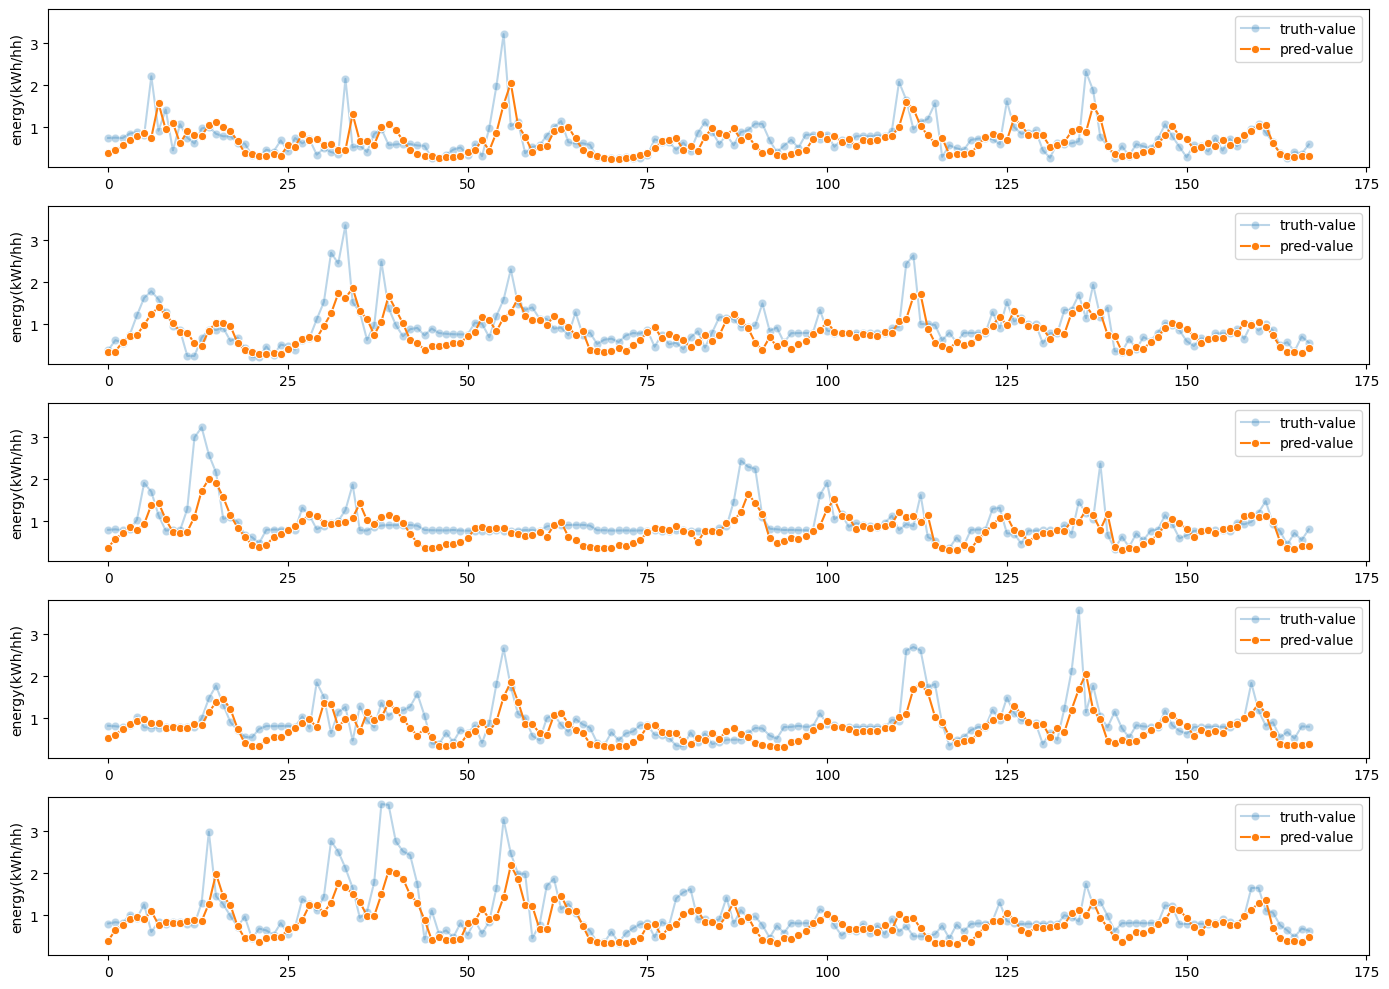

In [90]:
plot_forecast(y_pred, y_test, 5, 168)

# Multiple Households

1. Most granular is LCLid

### Prepare the data for multiple households

In [3]:
df.columns

Index(['tstp', 'energy(kWh/hh)', 'LCLid', 'stdorToU', 'Acorn', 'visibility',
       'windBearing', 'temperature', 'dewPoint', 'pressure',
       'apparentTemperature', 'windSpeed', 'precipType', 'humidity', 'summary',
       'DIGITAL_Internet Access: Usage in Last Week_20 hours or more',
       'DIGITAL_Internet Access: Usage in Last Week_3-7 hours',
       'DIGITAL_Internet Access: Usage in Last Week_8-19 hours',
       'DIGITAL_Internet Access: Usage in Last Week_Less than 2 hours',
       'DIGITAL_Internet Access: Usage in Last Week_Not at all',
       'DIGITAL_TV on Demand_Watch on a Mobile phone/Device',
       'DIGITAL_TV on Demand_Watch on a PC',
       'DIGITAL_TV on Demand_Watch on a TV set',
       'ECONOMY_Economic Activity_Employee Full-Time',
       'ECONOMY_Economic Activity_Employee Part-Time',
       'ECONOMY_Economic Activity_Retired',
       'ECONOMY_Economic Activity_Self-employed',
       'ECONOMY_Economic Activity_Student',
       'ECONOMY_Economic Activity_Unemplo

In [4]:
df.head(3)

tstp  energy(kWh/hh)      LCLid stdorToU    Acorn  \
0 2012-10-17 10:00:00           0.224  MAC003686      Std  ACORN-A   
1 2012-10-17 11:00:00           0.215  MAC003686      Std  ACORN-A   
2 2012-10-17 12:00:00           0.213  MAC003686      Std  ACORN-A   

   visibility  windBearing  temperature  dewPoint  pressure  ...  \
0       12.15        207.0        14.34     10.86    997.19  ...   
1       12.81        213.0        15.18     10.66    997.81  ...   
2       13.04        207.0        15.92      9.91    998.10  ...   

   shifted_energy_19h  shifted_energy_20h shifted_energy_21h  \
0               0.214               0.549              0.548   
1               0.358               0.214              0.549   
2               1.055               0.358              0.214   

   shifted_energy_22h shifted_energy_23h  shifted_energy_24h  \
0               0.557              0.801               0.317   
1               0.548              0.557               0.801   
2               0.549              0.548               0.557   

   rolling_mean_energy_6h  rolling_mean_energy_12h  rolling_mean_energy_18h  \
0                0.411333                 0.312000                 0.493111   
1                0.412333                 0.312333                 0.485667   
2                0.399833                 0.312333                 0.439000   

   rolling_mean_energy_24h  
0                 0.494250  
1                 0.490375  
2                 0.465958  

[3 rows x 86 columns]

### Some Extra Pre-Processing Before Modelling

In [4]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess

def create_fourier(date_index):
    fourier = CalendarFourier(
        freq='D',
        order=1
    )
    dp = DeterministicProcess(
        index=date_index,
        constant=True,
        order=1,
        seasonal=True,
        additional_terms=[fourier],
        drop=True
    )

    return dp

In [5]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# label encoding
precip_encoder = OneHotEncoder(sparse_output=False)
holiday_encoder = OneHotEncoder(sparse_output=False)
summary_encoder = OneHotEncoder(sparse_output=False)
household_encoder = LabelEncoder()
stdor_encoder = OneHotEncoder(sparse_output=False)
acorn_encoder = LabelEncoder()

precip_labels = precip_encoder.fit_transform(df[['precipType']])
holiday_labels = holiday_encoder.fit_transform(df[['Type']])
summary_labels = summary_encoder.fit_transform(df[['summary']])
household_labels = household_encoder.fit_transform(df[['LCLid']])
stdor_labels = stdor_encoder.fit_transform(df[['stdorToU']])
acorn_labels = acorn_encoder.fit_transform(df[['Acorn']])

precip_labels = pd.DataFrame(precip_labels, columns=precip_encoder.get_feature_names_out()).astype('int8')
holiday_labels = pd.DataFrame(holiday_labels, columns=holiday_encoder.get_feature_names_out()).astype('int8')
summary_labels = pd.DataFrame(summary_labels, columns=summary_encoder.get_feature_names_out()).astype('int8')
household_labels = pd.DataFrame(household_labels, columns=['household_label']).astype('int8')
stdor_labels = pd.DataFrame(stdor_labels, columns=stdor_encoder.get_feature_names_out()).astype('int8')
acorn_labels = pd.DataFrame(acorn_labels, columns=['acorn_label']).astype('int8')

encoded_df = pd.concat([df, precip_labels, holiday_labels, summary_labels, household_labels, stdor_labels, acorn_labels], axis=1)
encoded_df = encoded_df.drop(['precipType', 'Type', 'summary', 'LCLid', 'stdorToU', 'Acorn'], axis=1)

c:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
# process fourier features for each group and saved each group's deterministic process
import math

dps = {}

all_household_ids = encoded_df['household_label'].unique()
households_grp = encoded_df.groupby('household_label')
training_df = []
testing_df = []

for household_id in all_household_ids:
    # get the household from the entire df
    print("Household id:", household_id)
    singlehousehold_df = households_grp.get_group(household_id).sort_values(by='tstp', ascending=True)

    # split into train, test
    cutoff_point = math.floor(singlehousehold_df.shape[0] * 0.9)
    training_singlehousehold_df = singlehousehold_df.iloc[:cutoff_point].reset_index()
    testing_singlehousehold_df = singlehousehold_df.iloc[cutoff_point:].reset_index()

    # create fourier features
    fourier_obj = create_fourier(training_singlehousehold_df.set_index('tstp').asfreq('h').index)
    fourier_train_features = fourier_obj.in_sample().reset_index().drop(['tstp'], axis=1)
    training_singlehousehold_df = pd.concat([training_singlehousehold_df, fourier_train_features], axis=1)
    fourier_test_features = fourier_obj.out_of_sample(testing_singlehousehold_df.shape[0]).reset_index().drop(['index'], axis=1)
    testing_singlehousehold_df = pd.concat([testing_singlehousehold_df.reset_index().drop(['index'], axis=1), fourier_test_features], axis=1)
    
    # save the dp object
    dps[household_id] = fourier_obj

    # append to the household_dfs list
    training_df.append(training_singlehousehold_df)
    testing_df.append(testing_singlehousehold_df)

training_df = pd.concat(training_df, axis=0)
testing_df = pd.concat(testing_df, axis=0)

Household id: 35
Household id: 30
Household id: 14
Household id: 46
Household id: 41
Household id: 24
Household id: 26
Household id: 37
Household id: 6
Household id: 45
Household id: 19
Household id: 3
Household id: 39
Household id: 32
Household id: 8
Household id: 22
Household id: 11
Household id: 38
Household id: 42
Household id: 10
Household id: 15
Household id: 16
Household id: 29
Household id: 36
Household id: 1
Household id: 23
Household id: 31
Household id: 28
Household id: 21
Household id: 7
Household id: 49
Household id: 17
Household id: 27
Household id: 0
Household id: 44
Household id: 5
Household id: 40
Household id: 12
Household id: 48
Household id: 33
Household id: 13
Household id: 2
Household id: 50
Household id: 43
Household id: 25
Household id: 34
Household id: 20
Household id: 18
Household id: 4
Household id: 9
Household id: 47


In [7]:
training_df.shape

(686587, 137)

In [8]:
testing_df.shape

(76315, 137)

In [9]:
# scale the values
from sklearn.preprocessing import MinMaxScaler

# drop unnecessary columns
training_df = training_df.drop(['index', 'tstp'], axis=1)
testing_df = testing_df.drop(['level_0', 'tstp'], axis=1)

# separate into features and target
X_train = training_df.drop(['energy(kWh/hh)'], axis=1)
X_test = testing_df.drop(['energy(kWh/hh)'], axis=1)
y_train = training_df['energy(kWh/hh)']
y_test = testing_df['energy(kWh/hh)']

# store the household ids for future evaluation
test_household_ids = X_test['household_label']
train_household_ids = X_train['household_label']

# Scale with MinMax Normalization
scaler = MinMaxScaler(feature_range=(0, 1)) # scale to 0 and 1
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# reshape for LSTM, CNN-LSTM models
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

print(X_train.shape)
print(X_test.shape)

(686587, 1, 134)
(76315, 1, 134)


In [10]:
train_household_ids.shape

(686587,)

In [11]:
test_household_ids.shape

(76315,)

# Modelling

In [12]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

def adjusted_r2(y_pred, y_test):
   p = X_train.shape[2]
   r2 = r2_score(y_pred, y_test)
   n = y_test.shape[0]
   
   adjusted_coefficient = 1 - (1 - r2) * (n - 1) / (n - p - 1)

   return adjusted_coefficient

def evaluate_model(y_pred, y_test, deep_learning):
  """
    Evaluate the model predictions with all the regression metrics
  """
  if deep_learning:
    prediction = y_pred.ravel()

  else:
    prediction = y_pred

  print("RMSE:", mean_squared_error(y_test, prediction, squared=False))
  print("MSE:", mean_squared_error(y_test, prediction, squared=True))
  print("MAE:", mean_absolute_error(y_test, prediction))
  print("MAPE:", mean_absolute_percentage_error(y_test, prediction))
  print("R2 Score:", r2_score(y_test, prediction))
  print("Adjusted R2 Score:", adjusted_r2(y_test, prediction))

def plot_forecast(y_pred, y_test, number_of_slices=3, steps=168, skip=0):
    """
      Plot the forecasted values against the truth values for LSTM and CNN-LSTM
    """
    fig, axes = plt.subplots(number_of_slices, 1, sharey=True, figsize=(14, 10))
    timesteps = np.arange(0, steps)
    
    for i in range(number_of_slices):
        start_idx = 0 + (steps * i) + (skip)
        end_idx = steps * (1 + i) + (skip)
        sampled_test = y_test.iloc[start_idx:end_idx]
        sampled_pred = y_pred.reshape(-1)[start_idx:end_idx]
        mape_score = mean_absolute_percentage_error(sampled_test, sampled_pred)
        
        sns.lineplot(x=timesteps, y=y_test.iloc[start_idx:end_idx], label="truth-value", marker='o', alpha=0.3, ax=axes[i])
        sns.lineplot(x=timesteps, y=y_pred.reshape(-1)[start_idx:end_idx], label="pred-value", marker='o', ax=axes[i])
        axes[i].set_title(f'MAPE: {round(mape_score, 2)}')

    plt.tight_layout()
    plt.show()
    

### Extreme Gradient Boosting (XGBoost)

In [19]:
from xgboost import XGBRegressor

# reshape back to the original shape for XGBoost
ml_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) 
ml_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

xgb_model = XGBRegressor(n_estimators=500, learning_rate=0.001, objective='reg:squarederror', random_state=42, n_jobs=5)
xgb_model.fit(ml_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=5,
             num_parallel_tree=None, random_state=42, ...)

In [20]:
y_pred = xgb_model.predict(ml_test)
y_pred

array([0.59422845, 0.5846999 , 0.59378767, ..., 0.30059782, 0.30851436,
       0.30757162], dtype=float32)

In [21]:
evaluate_model(y_pred, y_test, False)

RMSE: 0.505113553596259
MSE: 0.2551397020266408
MAE: 0.2929355485283171
MAPE: 9444568397696.736
R2 Score: 0.38504660368755395
Adjusted R2 Score: 0.38396490566831176


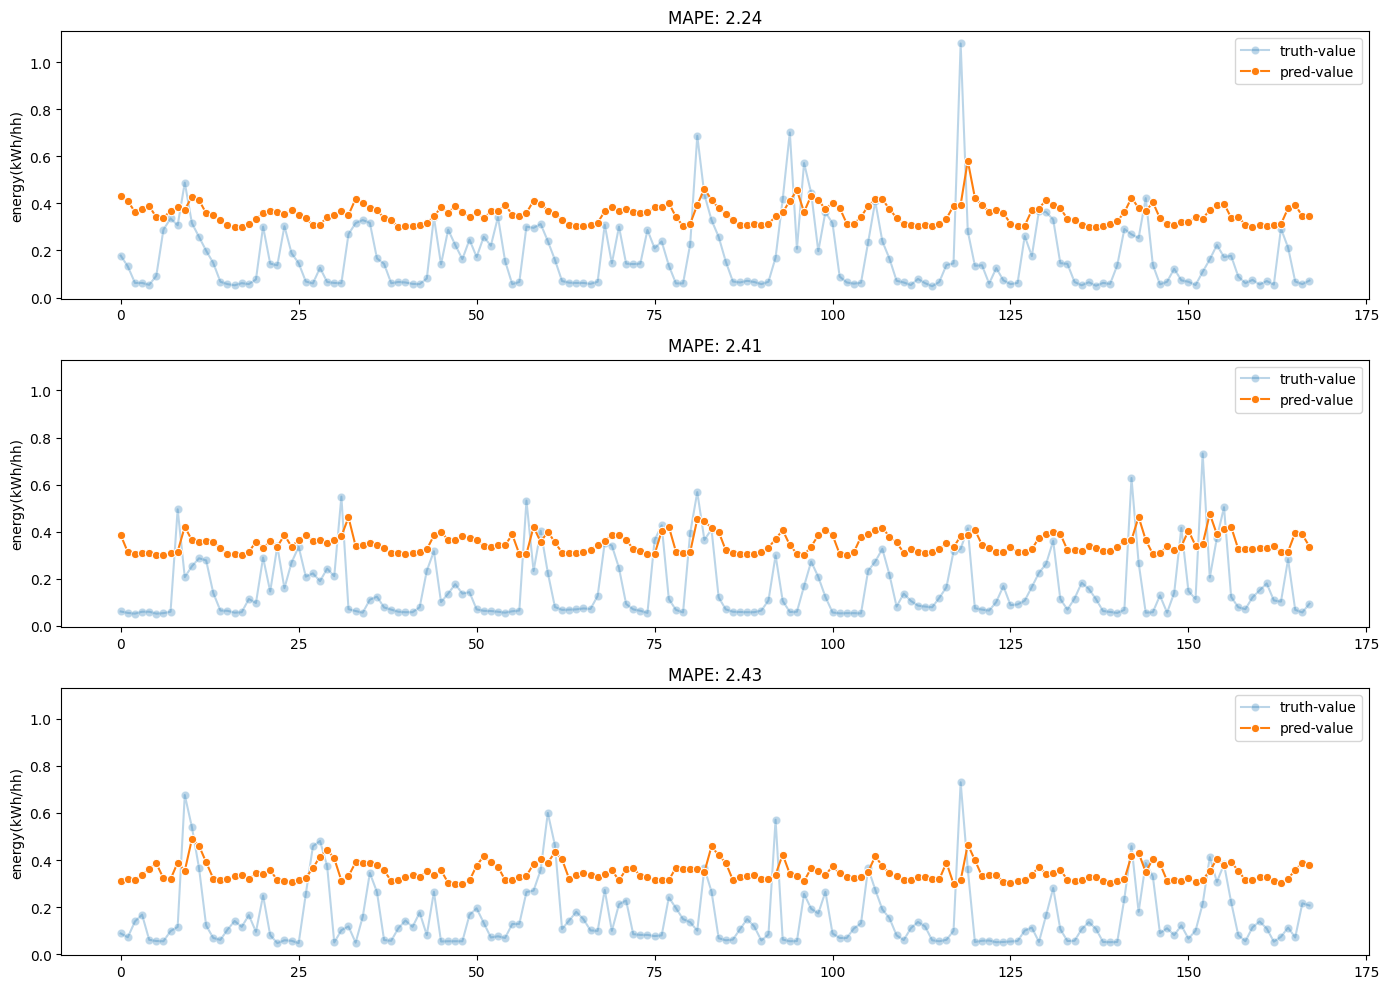

In [22]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### Random Forest

In [9]:
from sklearn.ensemble import RandomForestRegressor

# reshape back to the original shape for Random Forest
ml_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) 
ml_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

rf_model = RandomForestRegressor(n_estimators=500, max_depth=7, random_state=42, n_jobs=5)
rf_model.fit(ml_train, y_train)

RandomForestRegressor(max_depth=7, n_estimators=500, n_jobs=5, random_state=42)

In [10]:
y_pred = rf_model.predict(ml_test)

evaluate_model(y_pred, y_test, False)

RMSE: 0.3609981766760621
MSE: 0.13031968356344134
MAE: 0.18471983832891622
MAPE: 2149506447570.2297
R2 Score: 0.6858954863663926
Adjusted R2 Score: 0.6853429790832881


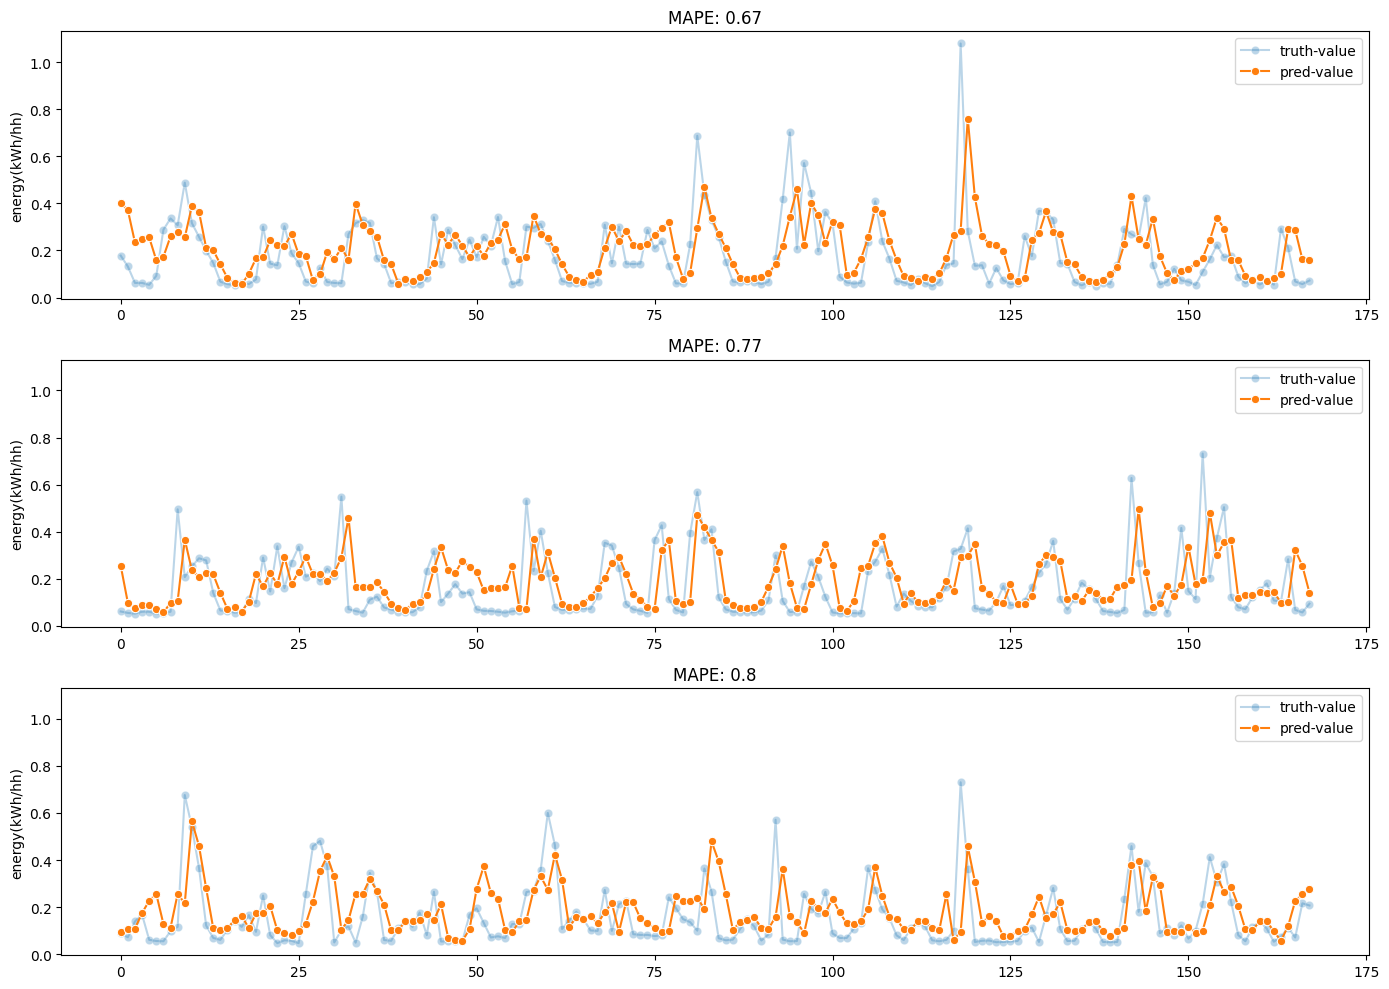

In [11]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### LSTM

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, RepeatVector, 
    TimeDistributed, Conv1D, MaxPooling1D, 
    Flatten, GRU, Dropout, 
    Normalization, Bidirectional, BatchNormalization, Input,
    Concatenate
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

input_layer = Input(shape=(1, X_train.shape[2]))
layer = LSTM(100, return_sequences=True)(input_layer)
layer = Dropout(0.4)(layer)
layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(64, activation='relu'))(layer)
output_layer = TimeDistributed(Dense(1))(layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=168,
    callbacks=[earlystop]
)

c:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
3270/3270 [==============================] - 23s 7ms/step - loss: 0.3815 - mae: 0.2207 - mse: 0.1497 - mape: 1514345.1250 - val_loss: 0.1132 - val_mae: 0.1698 - val_mse: 0.0846 - val_mape: 1235243.0000
Epoch 2/50
3270/3270 [==============================] - 20s 6ms/step - loss: 0.1604 - mae: 0.2037 - mse: 0.1326 - mape: 1283730.8750 - val_loss: 0.1187 - val_mae: 0.1586 - val_mse: 0.0908 - val_mape: 882905.1250
Epoch 3/50
3270/3270 [==============================] - 22s 7ms/step - loss: 0.1553 - mae: 0.2010 - mse: 0.1288 - mape: 1282047.6250 - val_loss: 0.1106 - val_mae: 0.1570 - val_mse: 0.0857 - val_mape: 1049732.7500
Epoch 4/50
3270/3270 [==============================] - 21s 6ms/step - loss: 0.1532 - mae: 0.2002 - mse: 0.1275 - mape: 1289638.7500 - val_loss: 0.1126 - val_mae: 0.1613 - val_mse: 0.0880 - val_mape: 1050973.1250
Epoch 5/50
3270/3270 [==============================] - 21s 6ms/step - loss: 0.1513 - mae: 0.1991 - mse: 0.1259 - mape: 1276775.1250 - val_loss: 0.11

In [44]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1, 134)]          0         
                                                                 
 lstm_5 (LSTM)               (None, 1, 100)            94000     
                                                                 
 dropout_4 (Dropout)         (None, 1, 100)            0         
                                                                 
 time_distributed_12 (TimeDi  (None, 1, 168)           16968     
 stributed)                                                      
                                                                 
 time_distributed_13 (TimeDi  (None, 1, 64)            10816     
 stributed)                                                      
                                                                 
 time_distributed_14 (TimeDi  (None, 1, 1)             65  

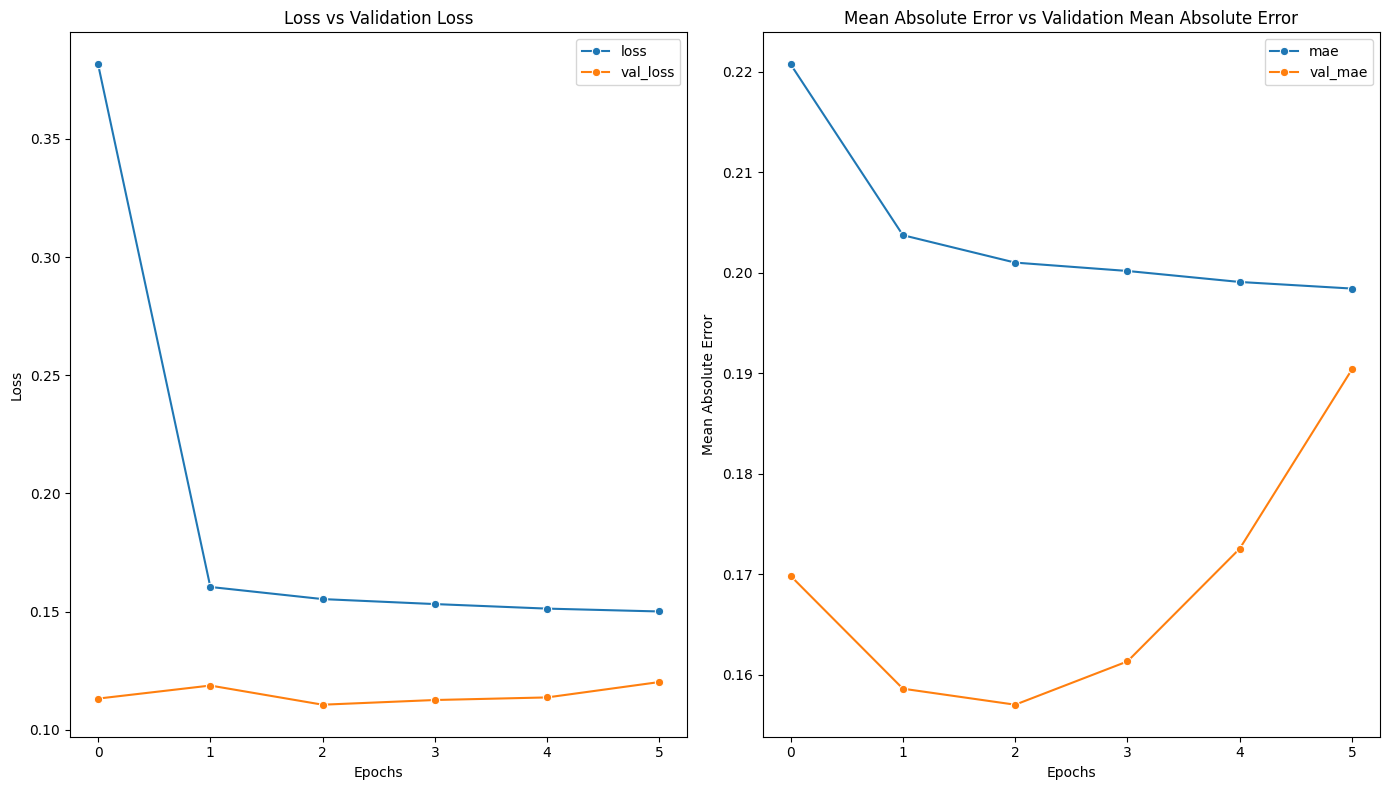

In [45]:
training_metrics = history.history
loss = training_metrics['loss']
val_loss = training_metrics['val_loss']
mae = training_metrics['mae']
val_mae = training_metrics['val_mae']


timesteps = np.arange(len(loss))
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.lineplot(x=timesteps, y=loss, label='loss', marker='o')
sns.lineplot(x=timesteps, y=val_loss, label='val_loss', marker='o')
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")  
plt.ylabel("Loss")

plt.subplot(1, 2, 2) 
sns.lineplot(x=timesteps, y=mae, label='mae', marker='o')
sns.lineplot(x=timesteps, y=val_mae, label='val_mae', marker='o')
plt.title("Mean Absolute Error vs Validation Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

plt.tight_layout()
plt.show()

In [14]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 4s 2ms/step
RMSE: 0.39438235934416566
MSE: 0.1555374453618706
MAE: 0.22350871437676148
MAPE: 4895011496568.58
R2 Score: 0.6251140864425068
Adjusted R2 Score: 0.6244546651716127


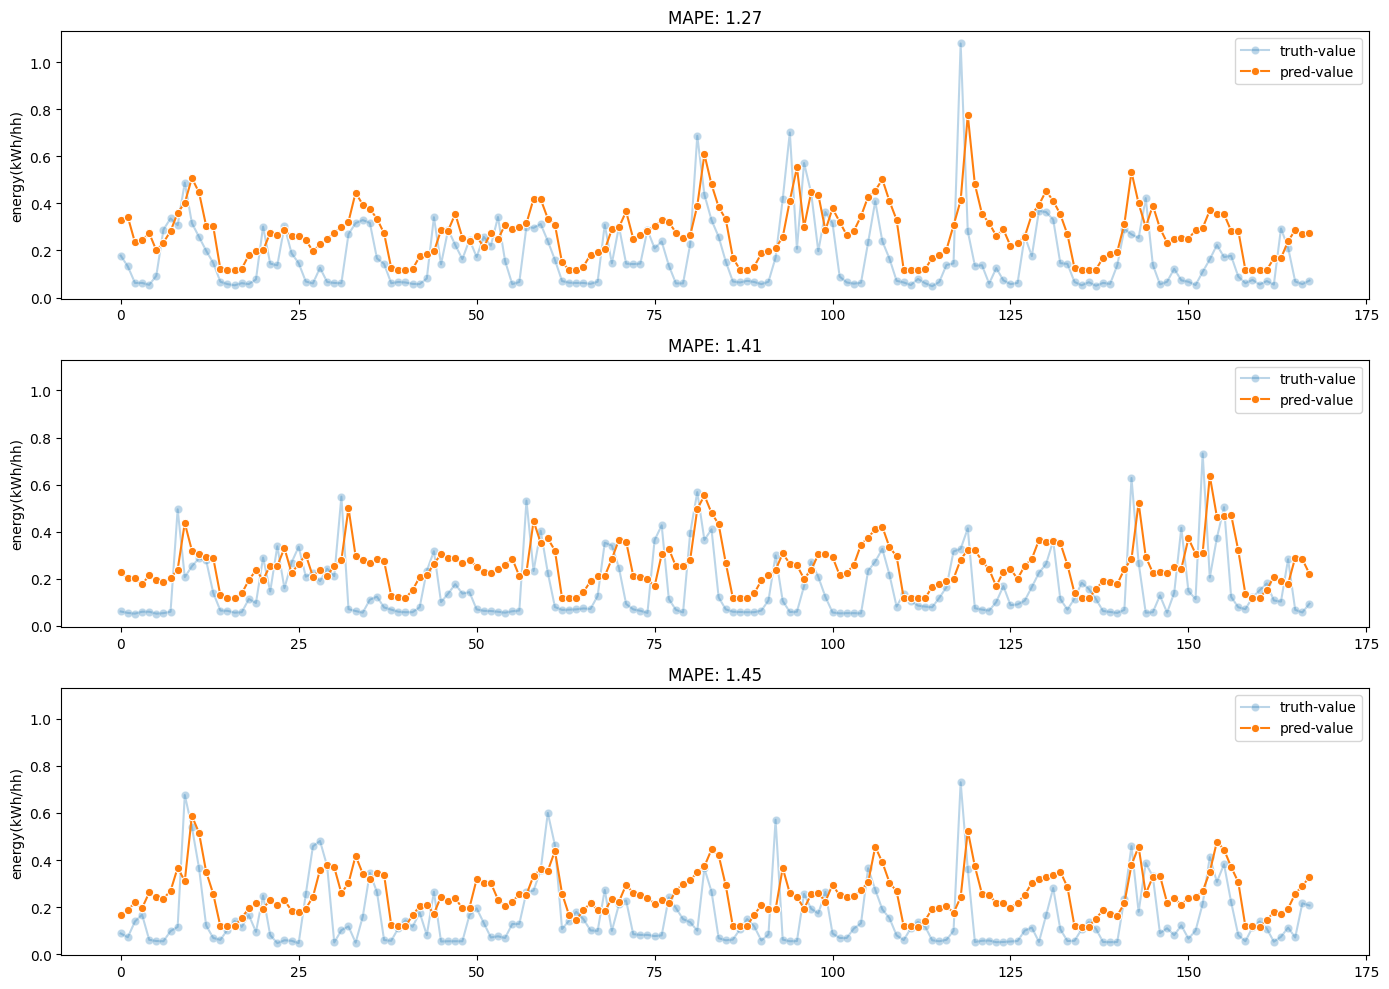

In [47]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### CNN-LSTM

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, RepeatVector, 
    TimeDistributed, Conv1D, MaxPooling1D, 
    Flatten, GRU, Dropout, 
    Normalization, Bidirectional, BatchNormalization, Input,
    Concatenate
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

input_layer = Input(shape=(1, X_train.shape[2]))
layer = Conv1D(100, kernel_size=1)(input_layer)
layer = LSTM(100, return_sequences=True)(layer)
layer = Dropout(0.4)(layer)
layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(64, activation='relu'))(layer)
output_layer = TimeDistributed(Dense(1))(layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_split=0.2,
    batch_size=168,
    callbacks=[earlystop]
)

c:\Users\Usrer\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/50
3270/3270 [==============================] - 23s 7ms/step - loss: 0.3771 - mae: 0.2156 - mse: 0.1456 - mape: 1494902.3750 - val_loss: 0.1204 - val_mae: 0.1737 - val_mse: 0.0908 - val_mape: 1246418.5000
Epoch 2/50
3270/3270 [==============================] - 23s 7ms/step - loss: 0.1606 - mae: 0.2034 - mse: 0.1315 - mape: 1349590.5000 - val_loss: 0.1240 - val_mae: 0.1615 - val_mse: 0.0949 - val_mape: 966644.3750
Epoch 3/50
3270/3270 [==============================] - 22s 7ms/step - loss: 0.1551 - mae: 0.2004 - mse: 0.1268 - mape: 1327867.3750 - val_loss: 0.1199 - val_mae: 0.1611 - val_mse: 0.0935 - val_mape: 1009439.9375
Epoch 4/50
3270/3270 [==============================] - 21s 6ms/step - loss: 0.1515 - mae: 0.1982 - mse: 0.1240 - mape: 1280886.3750 - val_loss: 0.1244 - val_mae: 0.1754 - val_mse: 0.0988 - val_mape: 1193847.3750
Epoch 5/50
3270/3270 [==============================] - 21s 6ms/step - loss: 0.1484 - mae: 0.1951 - mse: 0.1215 - mape: 1240704.0000 - val_loss: 0.13

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 134)]          0         
                                                                 
 conv1d (Conv1D)             (None, 1, 100)            13500     
                                                                 
 lstm (LSTM)                 (None, 1, 100)            80400     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 time_distributed (TimeDistr  (None, 1, 168)           16968     
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 64)            10816     
 tributed)                                                   

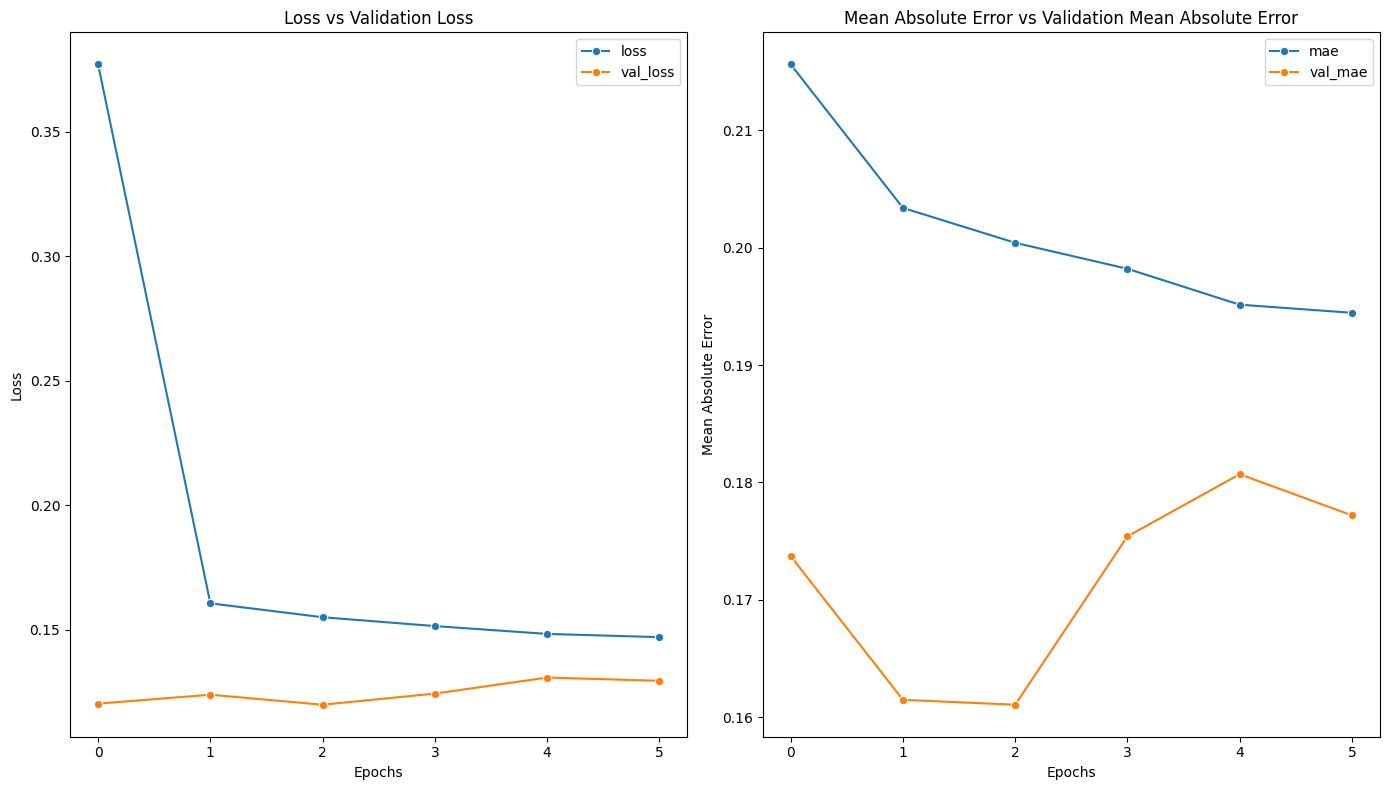

In [16]:
training_metrics = history.history
loss = training_metrics['loss']
val_loss = training_metrics['val_loss']
mae = training_metrics['mae']
val_mae = training_metrics['val_mae']


timesteps = np.arange(len(loss))
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.lineplot(x=timesteps, y=loss, label='loss', marker='o')
sns.lineplot(x=timesteps, y=val_loss, label='val_loss', marker='o')
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")  
plt.ylabel("Loss")

plt.subplot(1, 2, 2) 
sns.lineplot(x=timesteps, y=mae, label='mae', marker='o')
sns.lineplot(x=timesteps, y=val_mae, label='val_mae', marker='o')
plt.title("Mean Absolute Error vs Validation Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

plt.tight_layout()
plt.show()

In [17]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 4s 2ms/step
RMSE: 0.39251799826106293
MSE: 0.1540703789588718
MAE: 0.21714895280779695
MAPE: 4879605593023.527
R2 Score: 0.628650100085126
Adjusted R2 Score: 0.6279968986334511


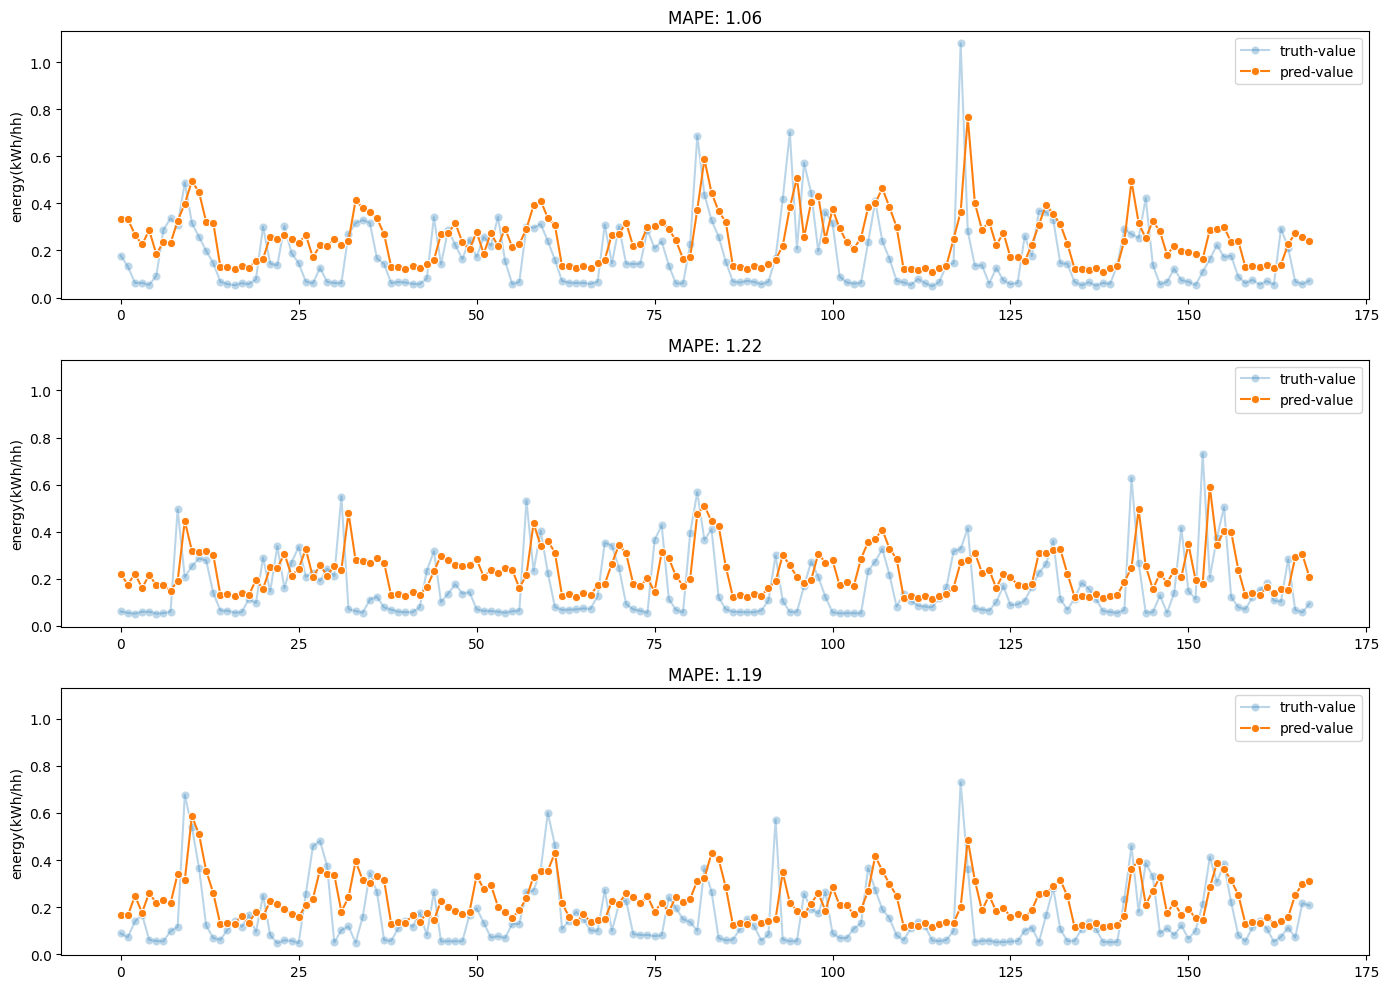

In [18]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

# Hyperparameter Tuning

In [18]:
def plot_training_metrics(history):
    training_metrics = history.history
    loss = training_metrics['loss']
    val_loss = training_metrics['val_loss']
    mae = training_metrics['mae']
    val_mae = training_metrics['val_mae']


    timesteps = np.arange(len(loss))
    plt.figure(figsize=(14, 8))
    plt.subplot(1, 2, 1)
    sns.lineplot(x=timesteps, y=loss, label='loss', marker='o')
    sns.lineplot(x=timesteps, y=val_loss, label='val_loss', marker='o')
    plt.title("Loss vs Validation Loss")
    plt.xlabel("Epochs")  
    plt.ylabel("Loss")

    plt.subplot(1, 2, 2) 
    sns.lineplot(x=timesteps, y=mae, label='mae', marker='o')
    sns.lineplot(x=timesteps, y=val_mae, label='val_mae', marker='o')
    plt.title("Mean Absolute Error vs Validation Mean Absolute Error")
    plt.xlabel("Epochs")
    plt.ylabel("Mean Absolute Error")

    plt.tight_layout()
    plt.show()

### Hyperparameter Tuning for XGBoost
1. learning_rate
2. max_depth = 6-10
3. n_estimators
4. reg_alpa


In [13]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBRegressor

# reshape back to the original shape for XGBoost
ml_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) 
ml_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

# combine both ml dataset to form a whole dataset, then the KFold will handle the splitting of training/testing
combined_X = np.vstack((ml_train, ml_test))
combined_y = pd.concat([y_train, y_test], axis=0) # y_train, y_test is pandas object so using pd.concat()

param_grid = {
  'max_depth': [6, 7, 8, 9],
  'n_estimators': [500, 750, 1000],
  'learning_rate': [0.001, 0.0001, 0.003, 0.0003],
  'reg_alpha': [0.5, 0.7, 0.9]
}

# 3 fold cross validation
fold_generator = KFold(n_splits=3, shuffle=True, random_state=42)
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=5) # uses 5 CPU cores
grid_search = GridSearchCV(xgb_model, param_grid, cv=fold_generator, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(combined_X, combined_y)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.5; total time=  26.4s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.5; total time=  24.8s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.5; total time=  25.9s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.7; total time=  26.2s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.7; total time=  25.7s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.7; total time=  25.3s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.9; total time=  25.8s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.9; total time=  26.1s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=500, reg_alpha=0.9; total time=  25.8s
[CV] END learning_rate=0.001, max_depth=6, n_estimators=750, reg_alpha=0.5; total 

GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    inte...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=5, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'learning_rate': [0.001, 0.0001, 0.003, 0.0003],
                         'max_depth': [6, 7, 8, 9],
                         'n_estimators': [500, 750, 1000],
                         'reg_alpha': [0.5, 0.7, 0.9]},
             scoring='neg_mean_squared_error', verbose=2)

In [14]:
print("Best Hyperparameter Set:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_) 
print("\n\n")
results = pd.DataFrame(grid_search.cv_results_)
results.head(3)

Best Hyperparameter Set: {'learning_rate': 0.003, 'max_depth': 9, 'n_estimators': 1000, 'reg_alpha': 0.5}
Best Score: -0.09841541267917558





mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      25.362441      0.693012         0.421464        0.012271   
1      25.375432      0.399119         0.444668        0.019397   
2      25.534569      0.130409         0.434505        0.007566   

  param_learning_rate param_max_depth param_n_estimators param_reg_alpha  \
0               0.001               6                500             0.5   
1               0.001               6                500             0.7   
2               0.001               6                500             0.9   

                                              params  split0_test_score  \
0  {'learning_rate': 0.001, 'max_depth': 6, 'n_es...          -0.187804   
1  {'learning_rate': 0.001, 'max_depth': 6, 'n_es...          -0.187814   
2  {'learning_rate': 0.001, 'max_depth': 6, 'n_es...          -0.187828   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0          -0.186780          -0.188034        -0.187539        0.000545   
1          -0.186791          -0.188041        -0.187549        0.000544   
2          -0.186807          -0.188052        -0.187562        0.000542   

   rank_test_score  
0               70  
1               71  
2               72

In [15]:
results.to_csv('grid_search_results_for_xgboost.csv', index=False)

In [16]:
# train with XGBoost
from xgboost import XGBRegressor

# reshape back to the original shape for XGBoost
ml_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) 
ml_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

best_hyperparameter = {'learning_rate': 0.003, 'max_depth': 9, 'n_estimators': 1000, 'reg_alpha': 0.5}
xgb_model = XGBRegressor(**best_hyperparameter, objective='reg:squarederror', random_state=42, n_jobs=5) # uses 5 CPU cores
xgb_model.fit(ml_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.003, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=5,
             num_parallel_tree=None, random_state=42, ...)

In [17]:
y_pred = xgb_model.predict(ml_test)

evaluate_model(y_pred, y_test, False)

RMSE: 0.3414873987032901
MSE: 0.11661364347313982
MAE: 0.17775628625776424
MAPE: 2622585884073.339
R2 Score: 0.7189306268661859
Adjusted R2 Score: 0.7184362281263601


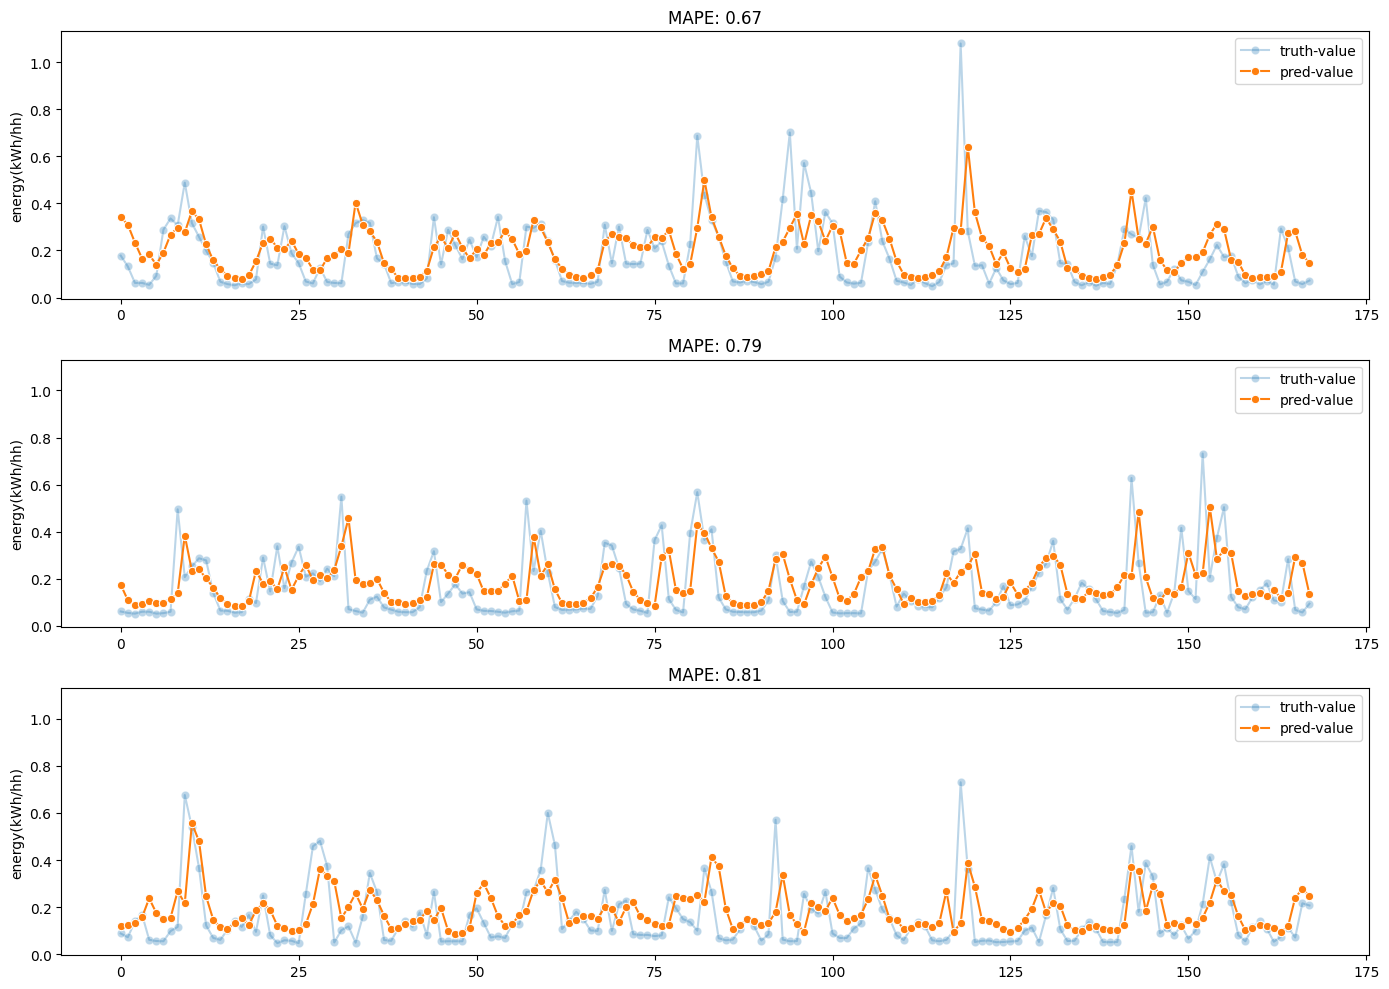

In [18]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### Hyperparameter Tuning for Random Forest

1. n_estimators
2. max_features
3. max_depth
4. min_samples_split
5. min_samples_leaf
6. bootstrap

In [18]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import randint as sp_randint

# reshape back to the original shape for XGBoost
ml_train = X_train.reshape(X_train.shape[0], X_train.shape[2]) 
ml_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

# combine both ml dataset to form a whole dataset, then the KFold will handle the splitting of training/testing
combined_X = np.vstack((ml_train, ml_test))
combined_y = pd.concat([y_train, y_test], axis=0) # y_train, y_test is pandas object so using pd.concat()

param_grid = {
  'max_depth': sp_randint(7, 10),
  'n_estimators': sp_randint(500, 1000),
  'min_samples_split': sp_randint(2, 5),
}

fold_generator = KFold(n_splits=3, shuffle=True, random_state=42)
rf_model = RandomForestRegressor(random_state=42, n_jobs=5) # uses 5 CPU cores for each model fit
grid_search = RandomizedSearchCV(rf_model, param_grid, n_iter=8, cv=3, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(combined_X, combined_y)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .max_depth=8, min_samples_split=4, n_estimators=983; total time=43.9min
[CV] END .max_depth=8, min_samples_split=4, n_estimators=983; total time=42.2min
[CV] END .max_depth=8, min_samples_split=4, n_estimators=983; total time=39.2min
[CV] END .max_depth=9, min_samples_split=2, n_estimators=702; total time=30.8min
[CV] END .max_depth=9, min_samples_split=2, n_estimators=702; total time=31.0min
[CV] END .max_depth=9, min_samples_split=2, n_estimators=702; total time=31.1min
[CV] END .max_depth=7, min_samples_split=3, n_estimators=855; total time=30.3min
[CV] END .max_depth=7, min_samples_split=3, n_estimators=855; total time=30.2min
[CV] END .max_depth=7, min_samples_split=3, n_estimators=855; total time=30.4min
[CV] END .max_depth=9, min_samples_split=4, n_estimators=784; total time=34.4min
[CV] END .max_depth=9, min_samples_split=4, n_estimators=784; total time=34.8min
[CV] END .max_depth=9, min_samples_split=4, n_est

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_jobs=5, random_state=42),
                   n_iter=8,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000162CE28EEF0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000162C0E8BEE0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000162C0E8B280>},
                   scoring='neg_mean_squared_error', verbose=2)

In [19]:
print("Best Hyperparameter Set:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_) 
print("\n\n")
results = pd.DataFrame(grid_search.cv_results_)
results.head(3)

Best Hyperparameter Set: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 702}
Best Score: -0.11962925114940472





mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0    2503.102578    117.264692         3.816133        0.288193   
1    1855.492812      6.334748         2.657000        0.048235   
2    1815.672458      5.565052         2.932030        0.018837   

  param_max_depth param_min_samples_split param_n_estimators  \
0               8                       4                983   
1               9                       2                702   
2               7                       3                855   

                                              params  split0_test_score  \
0  {'max_depth': 8, 'min_samples_split': 4, 'n_es...          -0.122867   
1  {'max_depth': 9, 'min_samples_split': 2, 'n_es...          -0.121356   
2  {'max_depth': 7, 'min_samples_split': 3, 'n_es...          -0.125431   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0          -0.131885          -0.107697        -0.120816        0.009981   
1          -0.130260          -0.107272        -0.119629        0.009464   
2          -0.133535          -0.108554        -0.122507        0.010406   

   rank_test_score  
0                4  
1                1  
2                7

In [20]:
results.to_csv('grid_search_results_for_random_forest.csv', index=False)

In [23]:
y_pred = grid_search.best_estimator_.predict(ml_test)

evaluate_model(y_pred, y_test, False)

RMSE: 0.32539021470737156
MSE: 0.10587879182730935
MAE: 0.17424829741051384
MAPE: 1925830019191.5198
R2 Score: 0.744804426302639
Adjusted R2 Score: 0.7443555393654449


In [24]:
best_hyperparameter = {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 702}
rf_model = RandomForestRegressor(**best_hyperparameter, random_state=42, n_jobs=5) # uses 5 CPU cores for each model fit

rf_model.fit(ml_train, y_train)

RandomForestRegressor(max_depth=9, n_estimators=702, n_jobs=5, random_state=42)

In [25]:
y_pred = rf_model.predict(ml_test)

evaluate_model(y_pred, y_test, False)

RMSE: 0.34802676772543284
MSE: 0.1211226310534124
MAE: 0.18118912614737806
MAPE: 2062127339131.76
R2 Score: 0.7080627877788387
Adjusted R2 Score: 0.7075492725985074


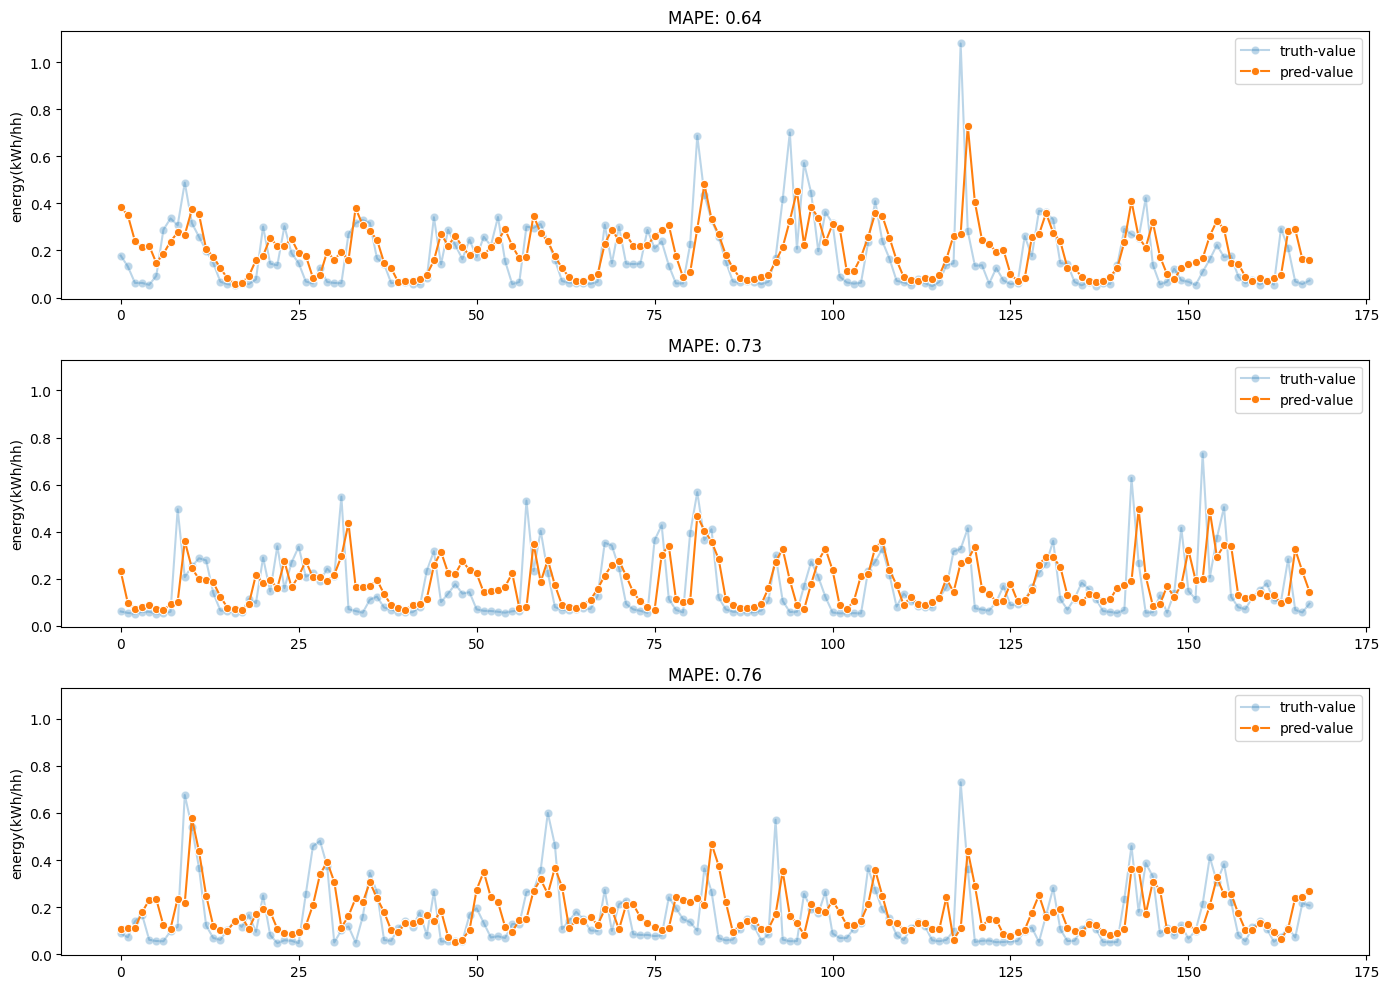

In [26]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### Hyperparameter Tuning for LSTM

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, LSTM, TimeDistributed, Dropout, Input,
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

input_layer = Input(shape=(1, X_train.shape[2]))
layer = LSTM(100, return_sequences=True)(input_layer)
layer = LSTM(100, return_sequences=True)(layer)
layer = Dropout(0.4)(layer)
layer = TimeDistributed(Dense(336, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(168, activation='relu'))(layer)
output_layer = TimeDistributed(Dense(1))(layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=168,
    callbacks=[earlystop]
)

Epoch 1/50
4087/4087 [==============================] - 34s 8ms/step - loss: 0.3775 - mae: 0.2023 - mse: 0.1306 - mape: 1332579.1250 - val_loss: 0.1824 - val_mae: 0.2123 - val_mse: 0.1349 - val_mape: 1056436.7500
Epoch 2/50
4087/4087 [==============================] - 30s 7ms/step - loss: 0.1594 - mae: 0.1883 - mse: 0.1134 - mape: 1147728.7500 - val_loss: 0.1717 - val_mae: 0.1971 - val_mse: 0.1252 - val_mape: 998656.0625
Epoch 3/50
4087/4087 [==============================] - 30s 7ms/step - loss: 0.1545 - mae: 0.1843 - mse: 0.1095 - mape: 1084549.0000 - val_loss: 0.1808 - val_mae: 0.1976 - val_mse: 0.1361 - val_mape: 997144.7500
Epoch 4/50
4087/4087 [==============================] - 30s 7ms/step - loss: 0.1523 - mae: 0.1823 - mse: 0.1076 - mape: 1076943.5000 - val_loss: 0.1675 - val_mae: 0.1936 - val_mse: 0.1240 - val_mape: 940056.4375
Epoch 5/50
4087/4087 [==============================] - 30s 7ms/step - loss: 0.1506 - mae: 0.1807 - mse: 0.1061 - mape: 1048762.6250 - val_loss: 0.1651

In [33]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 1, 134)]          0         
                                                                 
 lstm_12 (LSTM)              (None, 1, 100)            94000     
                                                                 
 lstm_13 (LSTM)              (None, 1, 100)            80400     
                                                                 
 dropout_6 (Dropout)         (None, 1, 100)            0         
                                                                 
 time_distributed_21 (TimeDi  (None, 1, 336)           33936     
 stributed)                                                      
                                                                 
 time_distributed_22 (TimeDi  (None, 1, 168)           56616     
 stributed)                                                

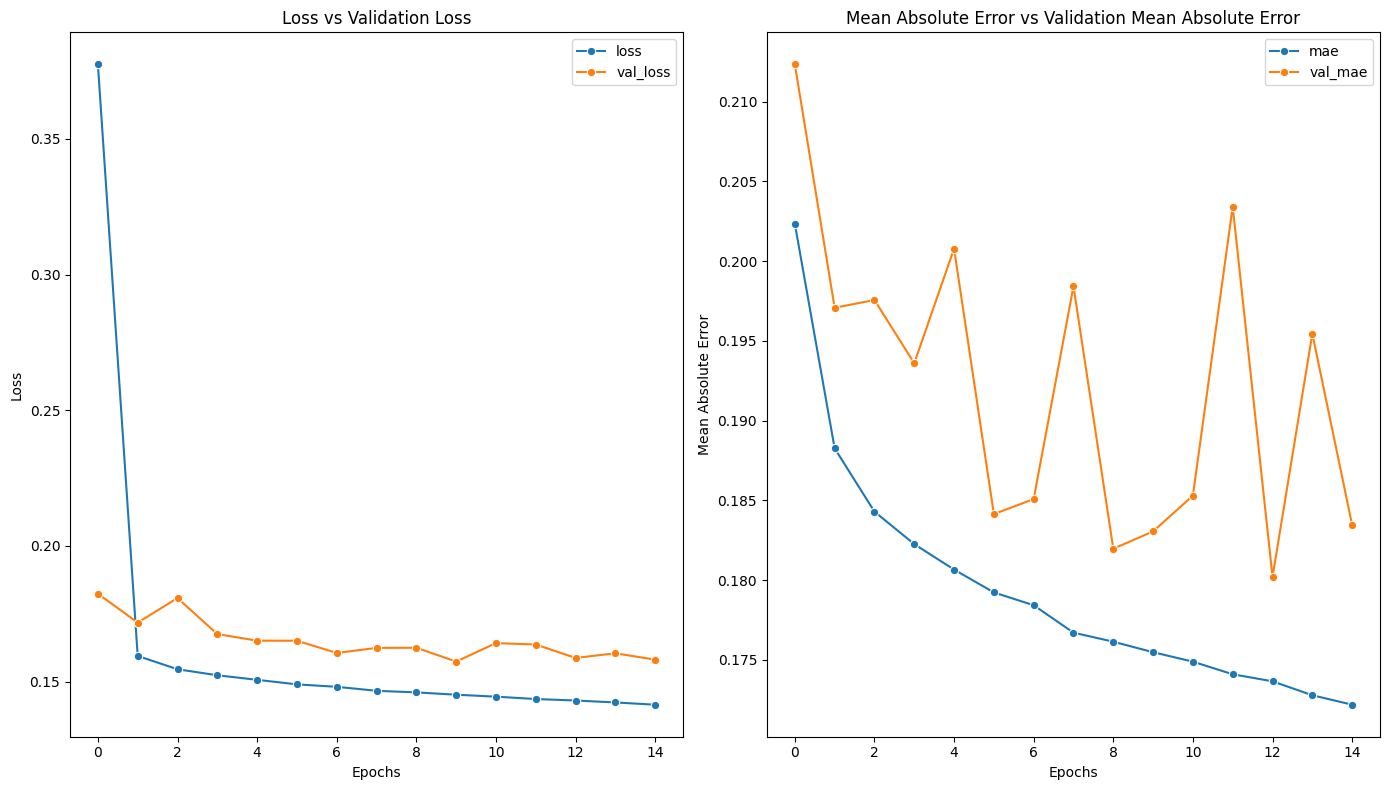

In [34]:
plot_training_metrics(history)

In [35]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 6s 2ms/step
RMSE: 0.33741998789387656
MSE: 0.11385224823030382
MAE: 0.18305614902303557
MAPE: 3144518019664.1743
R2 Score: 0.725586311456449
Adjusted R2 Score: 0.7251036200116494


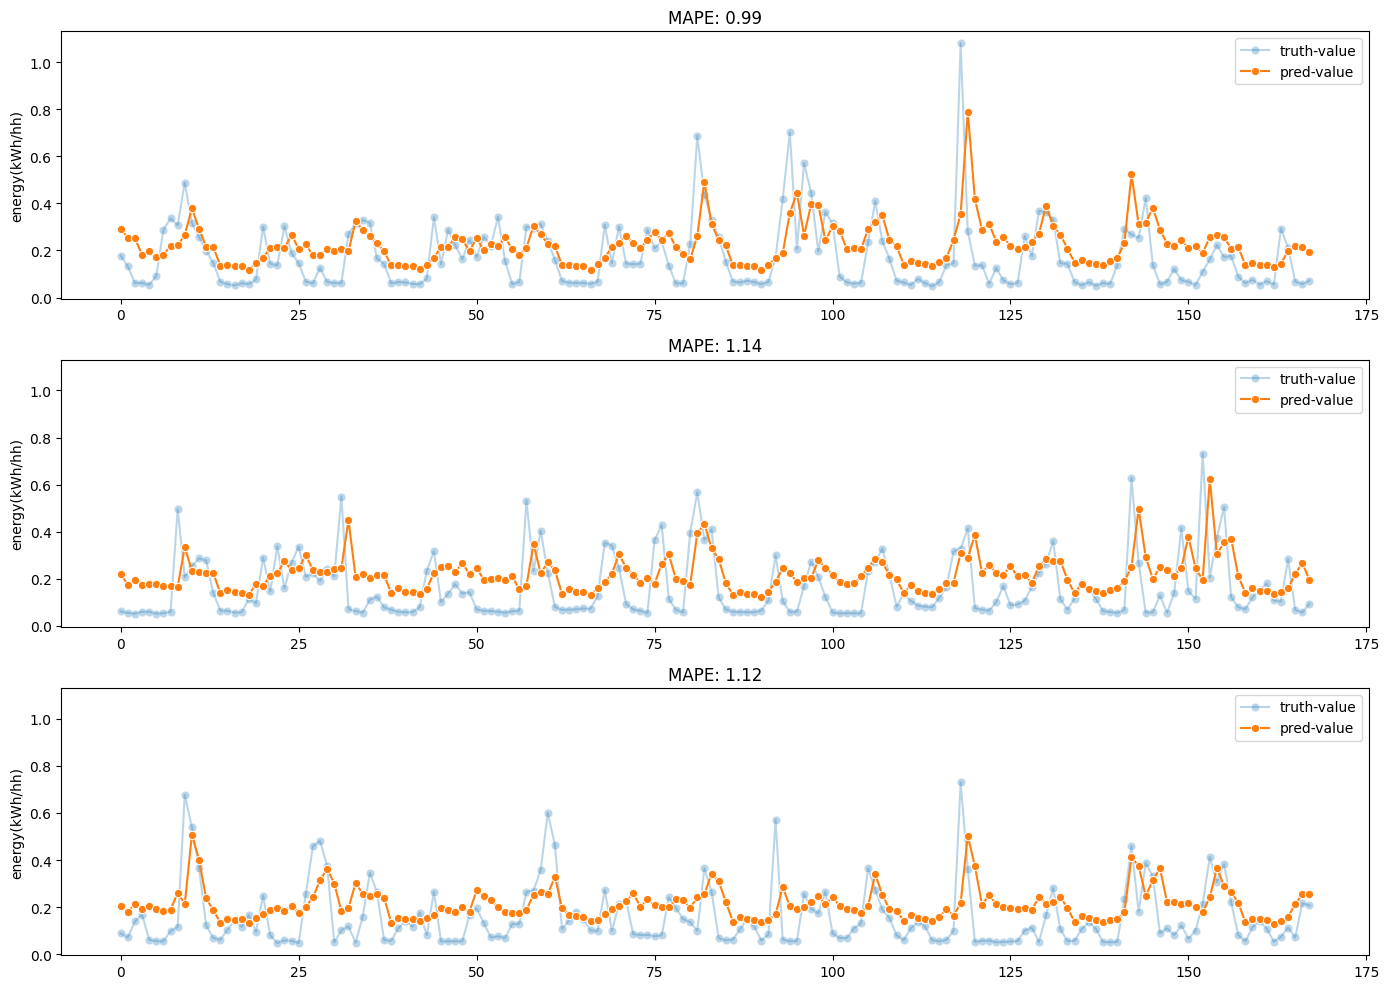

In [29]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### Set up Keras Tuner to tune the LSTM model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, LSTM,
    TimeDistributed, Dropout, Input
)
import keras_tuner as kt

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

class LSTMTunedModel(kt.HyperModel):

    def build(self, hyperparameters):
        # for reproducibility
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)
        tf.config.experimental.enable_op_determinism()

        hp_lstm_units = hyperparameters.Int("lstm_units", min_value=100, max_value=300, step=50)
        hp_dropout_rate = hyperparameters.Choice("dropout", values=[0.2, 0.3, 0.4, 0.5])
        hp_learning_rate = hyperparameters.Choice("learning_rate", values=[0.001, 0.0001, 0.00001, 0.003, 0.0003, 0.00003])

        # input 
        input_layer = Input(shape=(1, X_train.shape[2]))

        # stacked lstm
        lstm1 = LSTM(hp_lstm_units, return_sequences=True)(input_layer)
        lstm2 = LSTM(hp_lstm_units, return_sequences=True)(lstm1)
        dropout1 = Dropout(hp_dropout_rate)(lstm2)

        # full connected layer
        fc1 = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(dropout1)
        fc2 = TimeDistributed(Dense(64, activation='relu'))(fc1)

        # output
        output_layer = TimeDistributed(Dense(1))(fc2)  
        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(
            loss=tf.keras.losses.MSE,
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            metrics=['mae', 'mse', 'mape']
        )

        return model

    def fit(self, hyperparameters, model, *args, **kwargs):
        # for reproducibility
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)
        tf.config.experimental.enable_op_determinism()
        
        return model.fit(
            *args,
            batch_size=hyperparameters.Choice("batch_size", [168, 336, 504]),
            **kwargs,
        )


earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)
tuner = kt.Hyperband(
  LSTMTunedModel(),
  objective='val_mse',
  seed=42,
  max_epochs=50, # maximum number of epochs
  factor=3,
  directory='model_tune', # path to save the model tuning data
  project_name="tune_lstm_load_forecasting",
  overwrite=False
)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[earlystop])

Trial 90 Complete [00h 14m 06s]
val_mse: 0.11701849848031998

Best val_mse So Far: 0.109857939183712
Total elapsed time: 03h 54m 03s


In [ ]:
tuner.get_best_hyperparameters(num_trials=1)[0]

In [38]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'lstm_units': 200,
 'dropout': 0.5,
 'learning_rate': 0.003,
 'batch_size': 336,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0067'}

In [ ]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

In [48]:
# Train with the best hyperparameter set
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, LSTM,
    TimeDistributed, Dropout, Input
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

# input 
input_layer = Input(shape=(1, X_train.shape[2]))

# stacked lstm
layer = LSTM(200, return_sequences=True)(input_layer)
layer = LSTM(200, return_sequences=True)(layer)
layer = Dropout(0.5)(layer)

# full connected layer
layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(64, activation='relu'))(layer)

# output
output_layer = TimeDistributed(Dense(1))(layer)  
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=336,
    callbacks=[earlystop]
)

Epoch 1/50
2044/2044 [==============================] - 19s 8ms/step - loss: 0.4335 - mae: 0.2035 - mse: 0.1292 - mape: 1395393.1250 - val_loss: 0.2592 - val_mae: 0.2001 - val_mse: 0.1318 - val_mape: 895334.0625
Epoch 2/50
2044/2044 [==============================] - 17s 8ms/step - loss: 0.2365 - mae: 0.1887 - mse: 0.1122 - mape: 1212381.0000 - val_loss: 0.2529 - val_mae: 0.1948 - val_mse: 0.1273 - val_mape: 1106809.1250
Epoch 3/50
2044/2044 [==============================] - 18s 9ms/step - loss: 0.2314 - mae: 0.1843 - mse: 0.1084 - mape: 1148450.5000 - val_loss: 0.2674 - val_mae: 0.2044 - val_mse: 0.1450 - val_mape: 1005988.8750
Epoch 4/50
2044/2044 [==============================] - 17s 8ms/step - loss: 0.2290 - mae: 0.1812 - mse: 0.1062 - mape: 1102476.6250 - val_loss: 0.2390 - val_mae: 0.1863 - val_mse: 0.1181 - val_mape: 885599.9375
Epoch 5/50
2044/2044 [==============================] - 17s 9ms/step - loss: 0.2266 - mae: 0.1794 - mse: 0.1044 - mape: 1080653.3750 - val_loss: 0.250

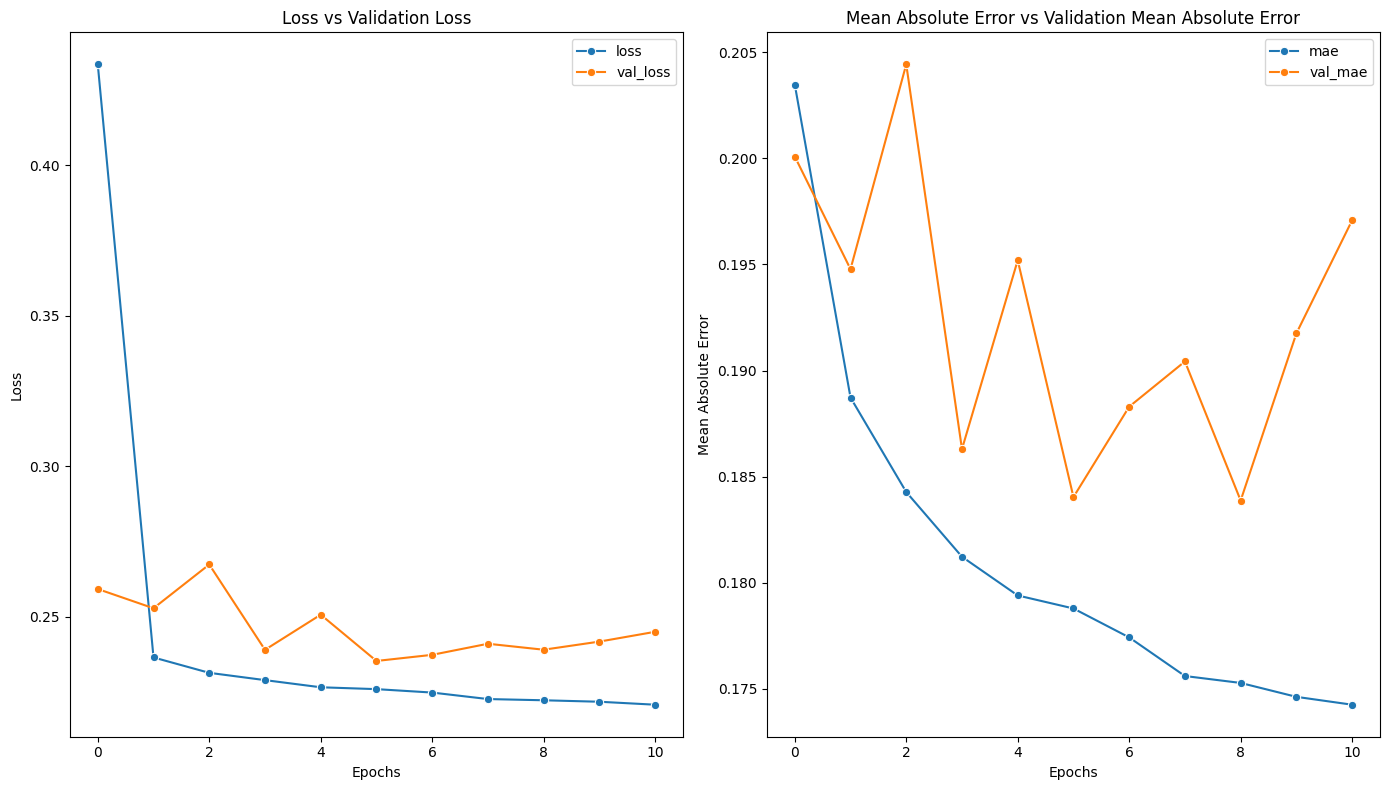

In [49]:
training_metrics = history.history
loss = training_metrics['loss']
val_loss = training_metrics['val_loss']
mae = training_metrics['mae']
val_mae = training_metrics['val_mae']

timesteps = np.arange(len(loss))
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.lineplot(x=timesteps, y=loss, label='loss', marker='o')
sns.lineplot(x=timesteps, y=val_loss, label='val_loss', marker='o')
plt.title("Loss vs Validation Loss")
plt.xlabel("Epochs")  
plt.ylabel("Loss")

plt.subplot(1, 2, 2) 
sns.lineplot(x=timesteps, y=mae, label='mae', marker='o')
sns.lineplot(x=timesteps, y=val_mae, label='val_mae', marker='o')
plt.title("Mean Absolute Error vs Validation Mean Absolute Error")
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")

plt.tight_layout()
plt.show()

In [50]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 6s 2ms/step
RMSE: 0.33738303593599034
MSE: 0.11382731293738574
MAE: 0.1840354311189501
MAPE: 3686968862888.852
R2 Score: 0.7256464120325108
Adjusted R2 Score: 0.7251638263041353


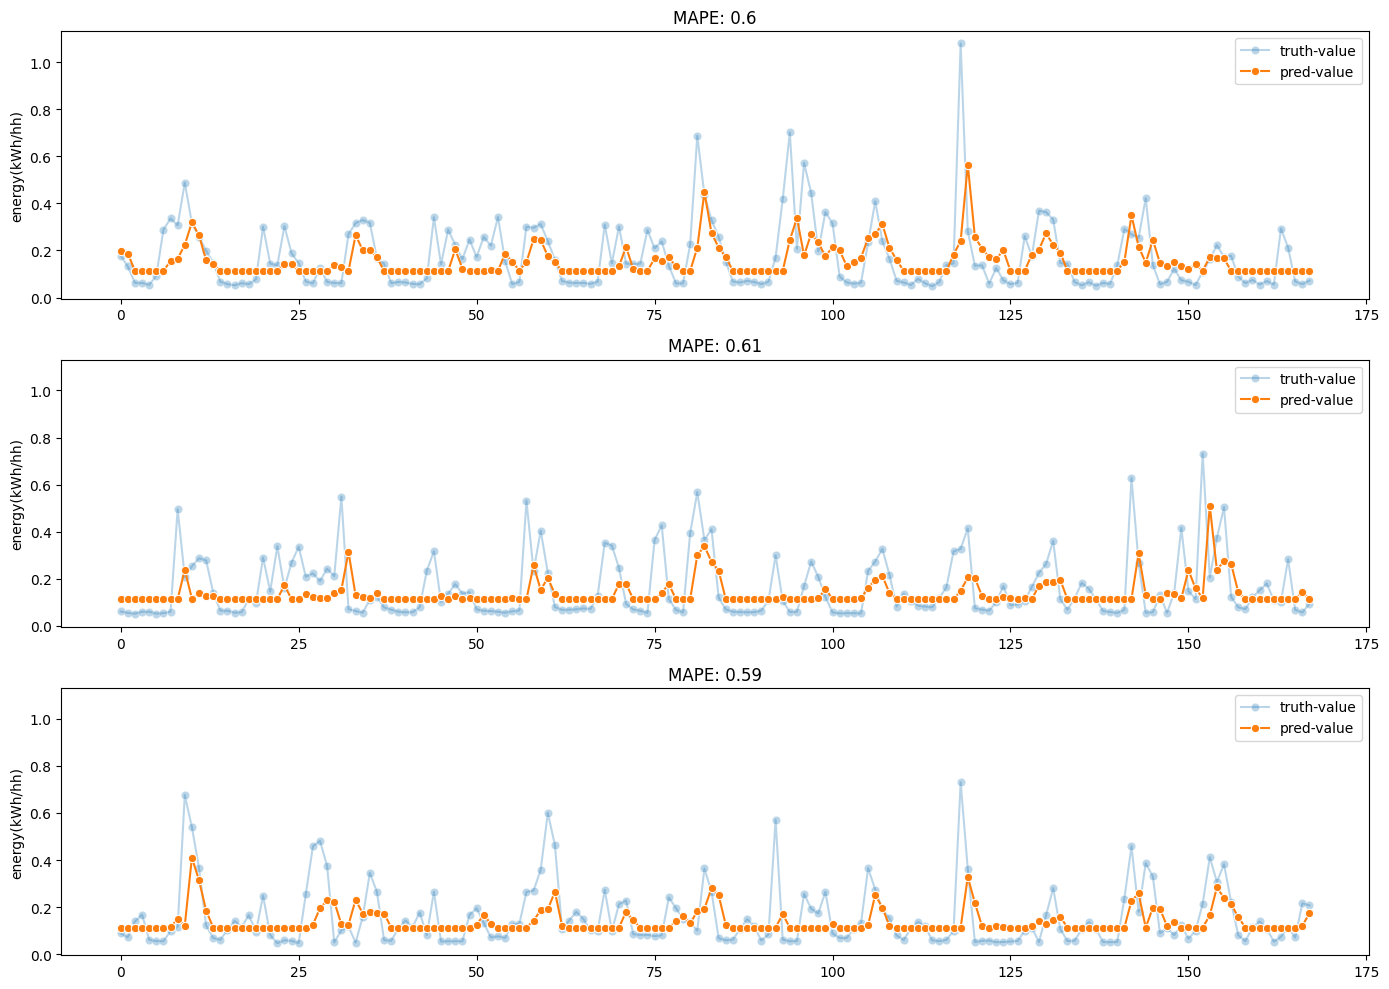

In [51]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

### Hyperparameter Tuning for CNN-LSTM

Tune Aspects:
1. Add 1 CNN layer
2. Add 1 LSTM layer
3. Add 1 Dense Layer

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, TimeDistributed, Conv1D, Dropout, Input
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

input_layer = Input(shape=(1, X_train.shape[2]))
layer = Conv1D(100, kernel_size=1, activation='relu')(input_layer)
layer = Conv1D(100, kernel_size=1, activation='relu')(input_layer)
layer = LSTM(100, return_sequences=True)(layer)
layer = LSTM(100, return_sequences=True)(layer)
layer = Dropout(0.4)(layer)
layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
layer = TimeDistributed(Dense(64, activation='relu'))(layer)
output_layer = TimeDistributed(Dense(1))(layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=168,
    callbacks=[earlystop]
)

Epoch 1/50
4087/4087 [==============================] - 40s 9ms/step - loss: 0.5690 - mae: 0.2031 - mse: 0.1321 - mape: 1397226.6250 - val_loss: 0.2025 - val_mae: 0.2032 - val_mse: 0.1342 - val_mape: 1000189.5625
Epoch 2/50
4087/4087 [==============================] - 38s 9ms/step - loss: 0.1787 - mae: 0.1864 - mse: 0.1125 - mape: 1160466.2500 - val_loss: 0.1939 - val_mae: 0.2088 - val_mse: 0.1277 - val_mape: 1062892.6250
Epoch 3/50
4087/4087 [==============================] - 38s 9ms/step - loss: 0.1730 - mae: 0.1826 - mse: 0.1087 - mape: 1096371.7500 - val_loss: 0.1985 - val_mae: 0.2021 - val_mse: 0.1347 - val_mape: 1024011.9375
Epoch 4/50
4087/4087 [==============================] - 38s 9ms/step - loss: 0.1702 - mae: 0.1808 - mse: 0.1068 - mape: 1065014.7500 - val_loss: 0.1875 - val_mae: 0.2170 - val_mse: 0.1267 - val_mape: 1130989.8750
Epoch 5/50
4087/4087 [==============================] - 38s 9ms/step - loss: 0.1681 - mae: 0.1798 - mse: 0.1055 - mape: 1038021.0000 - val_loss: 0.1

In [74]:
model.summary()

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 1, 134)]          0         
                                                                 
 conv1d_11 (Conv1D)          (None, 1, 100)            13500     
                                                                 
 lstm_27 (LSTM)              (None, 1, 100)            80400     
                                                                 
 dropout_17 (Dropout)        (None, 1, 100)            0         
                                                                 
 time_distributed_56 (TimeDi  (None, 1, 168)           16968     
 stributed)                                                      
                                                                 
 time_distributed_57 (TimeDi  (None, 1, 168)           28392     
 stributed)                                               

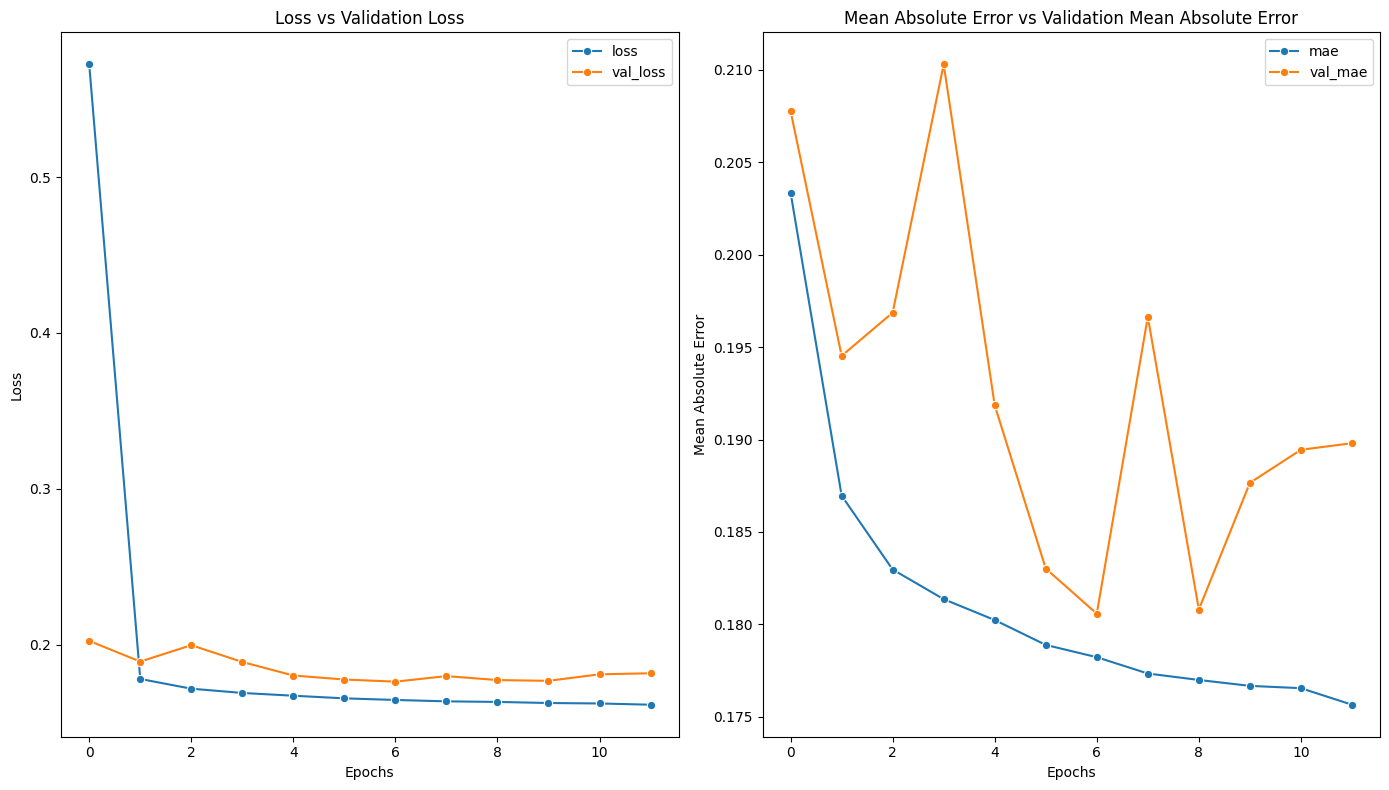

In [75]:
plot_training_metrics(history)

In [82]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 7s 3ms/step
RMSE: 0.33511925939469867
MSE: 0.11230491801725133
MAE: 0.18095431194092973
MAPE: 3292280814260.287
R2 Score: 0.7293157818688356
Adjusted R2 Score: 0.7288396505321386


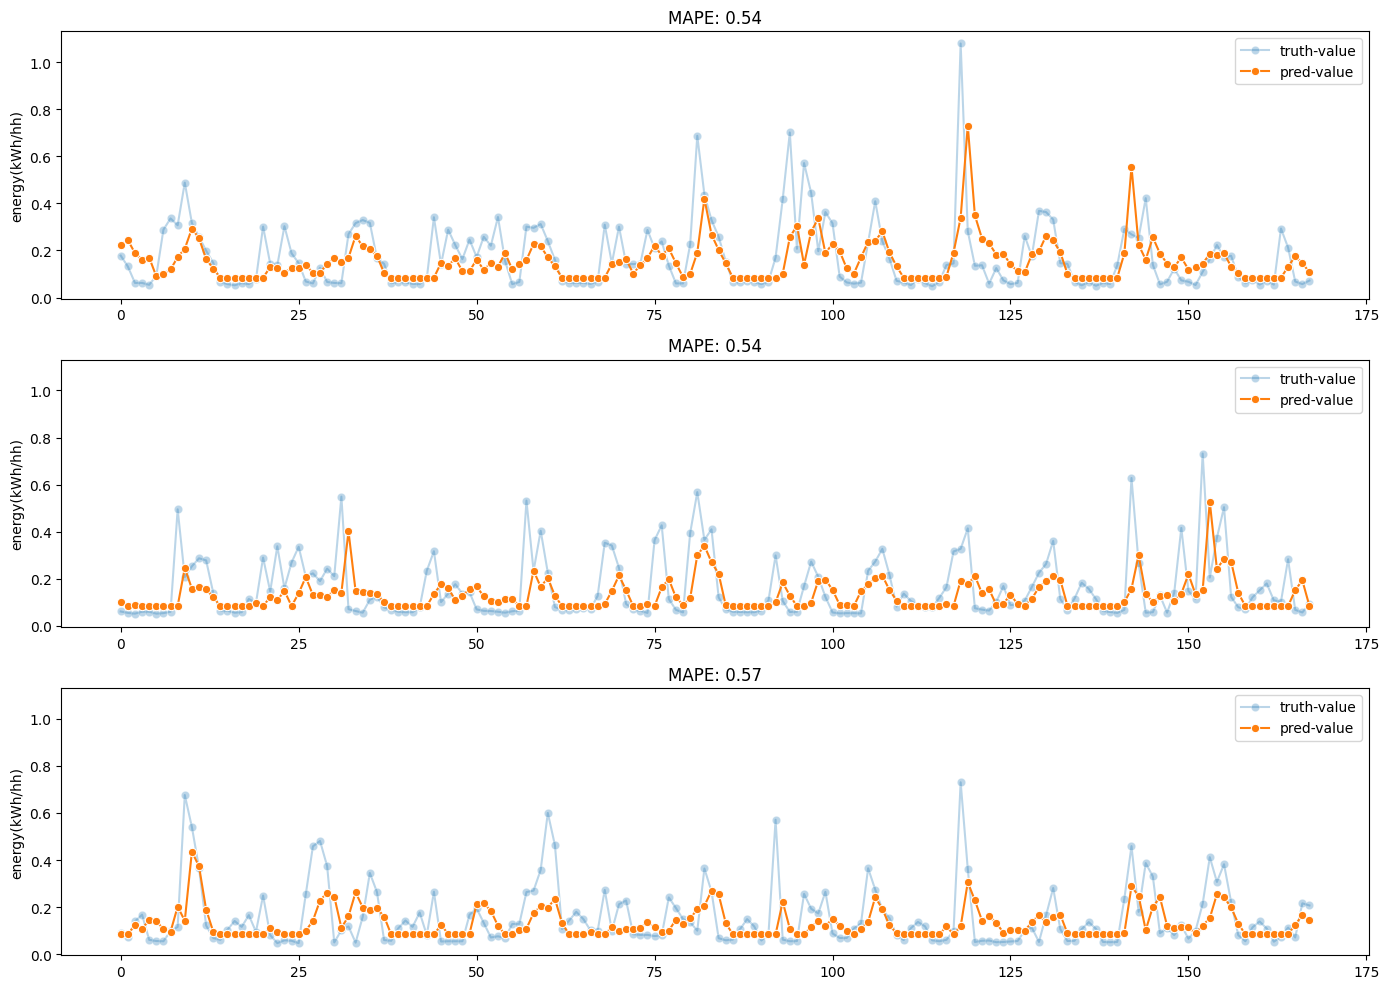

In [80]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24))

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, LSTM, Conv1D,
    TimeDistributed, Dropout, Input
)
import keras_tuner as kt

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

class TunedCNNLSTMModel(kt.HyperModel):

    def build(self, hyperparameters):
        # for reproducibility
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)
        tf.config.experimental.enable_op_determinism()

        hp_filter_size = hyperparameters.Int("filter_size", min_value=100, max_value=300, step=50)
        hp_lstm_units = hyperparameters.Int("lstm_units", min_value=100, max_value=300, step=50)
        hp_dropout_rate = hyperparameters.Choice("dropout", values=[0.2, 0.3, 0.4, 0.5])
        hp_learning_rate = hyperparameters.Choice("learning_rate", values=[0.001, 0.0001, 0.003, 0.0003, 0.00001, 0.00003])

        # input 
        input_layer = Input(shape=(1, X_train.shape[2]))

        # CNN and LSTM layers
        layer = Conv1D(hp_filter_size, kernel_size=1, activation='relu')(input_layer)
        layer = LSTM(hp_lstm_units, return_sequences=True)(layer)
        layer = LSTM(hp_lstm_units, return_sequences=True)(layer)
        layer = Dropout(hp_dropout_rate)(layer)

        # fully connected layer
        layer = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(layer)
        layer = TimeDistributed(Dense(64, activation='relu'))(layer)

        # output and model 
        output_layer = TimeDistributed(Dense(1))(layer)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(
            loss=tf.keras.losses.MSE,
            optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
            metrics=['mae', 'mse', 'mape']
        )

        return model

    def fit(self, hyperparameters, model, *args, **kwargs):
        # for reproducibility
        tf.random.set_seed(42)
        tf.keras.utils.set_random_seed(42)
        tf.config.experimental.enable_op_determinism()

        return model.fit(
            *args,
            batch_size=hyperparameters.Choice("batch_size", [168, 336, 504]),
            **kwargs,
        )


earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)
tuner = kt.Hyperband(
  TunedCNNLSTMModel(),
  objective='val_mse',
  seed=42,
  max_epochs=50,
  factor=3,
  directory='cnn_lstm_tune', # path to save the model tuning data
  project_name="cnn_lstm_tune",
  overwrite=False
)
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[earlystop])

Trial 90 Complete [00h 12m 19s]
val_mse: 0.11369597166776657

Best val_mse So Far: 0.10785315185785294
Total elapsed time: 03h 46m 43s


In [13]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps.values

{'filter_size': 200,
 'lstm_units': 300,
 'dropout': 0.2,
 'learning_rate': 0.001,
 'batch_size': 504,
 'tuner/epochs': 50,
 'tuner/initial_epoch': 17,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0071'}

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Dense, LSTM, TimeDistributed, Conv1D, Dropout, Input
)

# for reproducibility
tf.random.set_seed(42)
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_mse', patience=5, restore_best_weights=True)

input_layer = Input(shape=(1, X_train.shape[2]))
cnn1 = Conv1D(200, kernel_size=1, activation='relu')(input_layer)
lstm1 = LSTM(300, return_sequences=True)(cnn1)
lstm1 = LSTM(300, return_sequences=True)(cnn1)
dropout1 = Dropout(0.2)(lstm1)
fc1 = TimeDistributed(Dense(168, activation='relu', kernel_regularizer='l1'))(dropout1)
fc2 = TimeDistributed(Dense(64, activation='relu'))(fc1)
output_layer = TimeDistributed(Dense(1))(fc2)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mae', 'mse', 'mape']
)

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    batch_size=168,
    callbacks=[earlystop]
)

Epoch 1/50
4087/4087 [==============================] - 28s 7ms/step - loss: 0.4727 - mae: 0.2007 - mse: 0.1269 - mape: 1345949.5000 - val_loss: 0.1942 - val_mae: 0.1956 - val_mse: 0.1273 - val_mape: 905609.8125
Epoch 2/50
4087/4087 [==============================] - 27s 7ms/step - loss: 0.1739 - mae: 0.1840 - mse: 0.1092 - mape: 1071811.0000 - val_loss: 0.1879 - val_mae: 0.1929 - val_mse: 0.1238 - val_mape: 968624.3750
Epoch 3/50
4087/4087 [==============================] - 27s 7ms/step - loss: 0.1689 - mae: 0.1798 - mse: 0.1057 - mape: 1019621.1875 - val_loss: 0.1921 - val_mae: 0.1903 - val_mse: 0.1298 - val_mape: 839356.7500
Epoch 4/50
4087/4087 [==============================] - 26s 6ms/step - loss: 0.1665 - mae: 0.1780 - mse: 0.1040 - mape: 990080.2500 - val_loss: 0.1832 - val_mae: 0.1925 - val_mse: 0.1219 - val_mape: 882089.8750
Epoch 5/50
4087/4087 [==============================] - 27s 7ms/step - loss: 0.1653 - mae: 0.1764 - mse: 0.1031 - mape: 961158.5000 - val_loss: 0.1841 - 

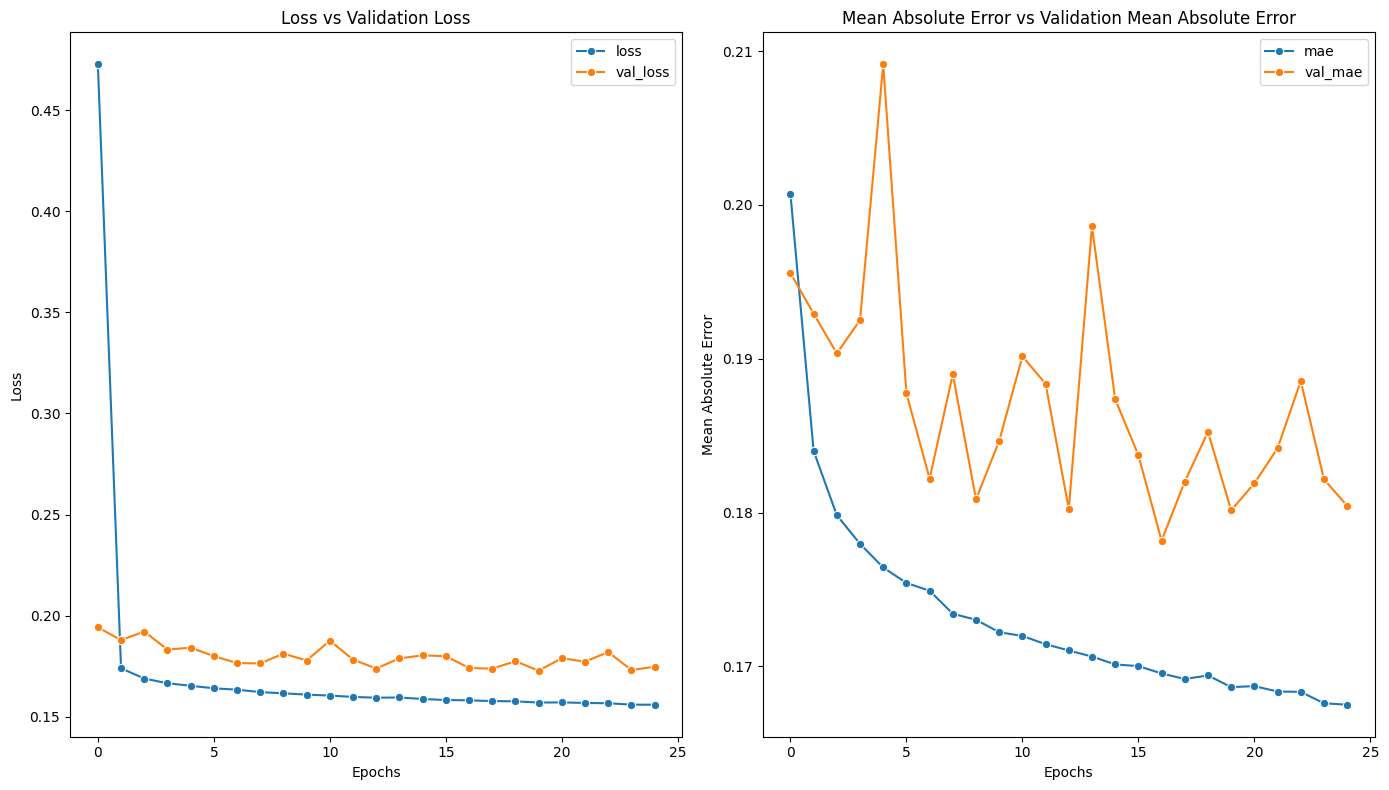

In [19]:
plot_training_metrics(history)

In [15]:
y_pred = model.predict(X_test)

evaluate_model(y_pred, y_test, True)

2385/2385 [==============================] - 5s 2ms/step
RMSE: 0.3344758714372591
MSE: 0.11187410857371388
MAE: 0.18015028863594046
MAPE: 3055097292303.248
R2 Score: 0.7303541452766567
Adjusted R2 Score: 0.7298798404127432


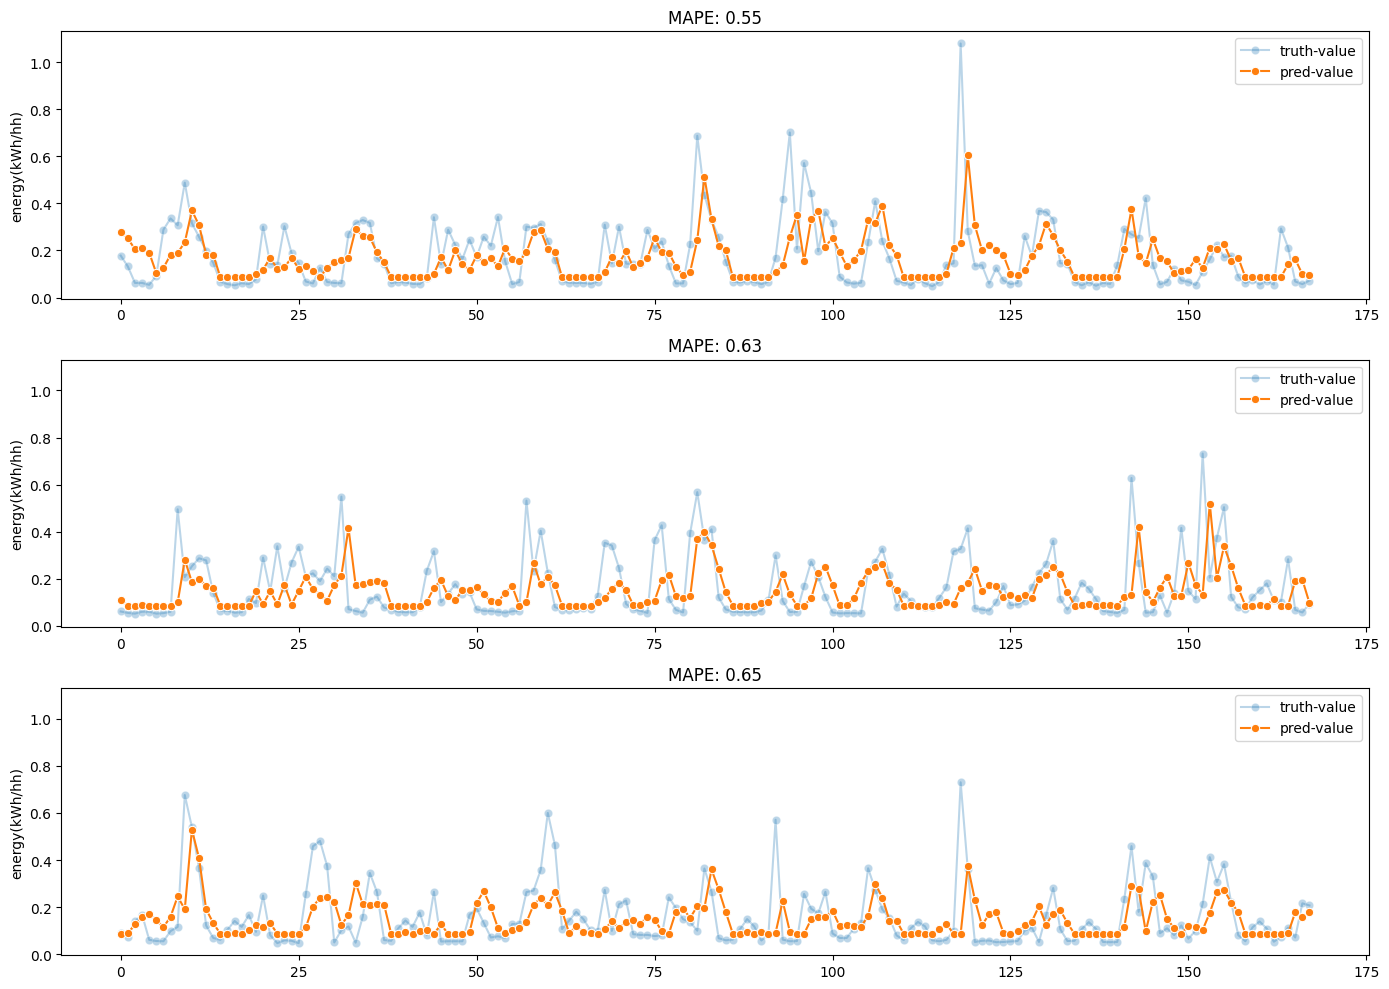

In [16]:
plot_forecast(y_pred, y_test, 3, 168, skip=(168*24)) 